# **Import Package**

In [ ]:
# install torch geometric
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
! pip install networkx
! pip install scipy

1.13.1+cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 30.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **1. Data Preprocessing**

In [ ]:
# Change the work directory
%ls
%cd
%cd ..
%cd /content/drive/MyDrive/Reaserch_Project
%ls

drive/  sample_data/
/root
/
/content/drive/MyDrive/Reaserch_Project
 A.npy
 code/
'comlexity result matrix (deep model).pt'
'comlexity result matrix.pt'
'Copy of comlexity result matrix.pt'
'Copy of GNNs_test_torch.ipynb'
 data/
 feats.npy
'GALA model.png'
'GAT Model (head = 1).png'
'GAT Model (head = 3).png'
'GAT Model.png'
'GCN Model.png'
'GCN Model_test.png'
 GNNs_test.ipynb
 GNNs_test_torch.ipynb
 GNNs_test_torch_tt.ipynb
'GraphSAGE Model.png'
'Hidden depth.png'
'Hidden Dimension.png'
 labels.npy
 literature/
 model.tutorial/
 musae_git_edges.csv
 musae_git_features.json
 musae_git_target.csv
 pytorch.tutorial/
 reconstruction_GAT_diff_noi+input.png
 reconstruction_GAT_diff_noi.png
 reconstruction_GAT.png
 reconstruction_GCN_diff_noi+input.png
 reconstruction_GCN_diff_noi.png
 reconstruction_GCN.png
 reconstruction_GraphSAGE_2.png
 reconstruction_GraphSAGE_diff_noi+input.png
 reconstruction_GraphSAGE_diff_noi.png
 reconstruction_GraphSAGE.png
 test_idx.npy
 test.npy
 train_idx.npy

**Load Cora data (internal)**

In [ ]:
# Load Cora dataset
dataset = Planetoid(root = 'tutorial1', name = "Cora")

In [ ]:
# Print dataset
print(dataset)
print('The number of graphs:',len(dataset)) # number of graphs
print('The number of node classes:',dataset.num_classes)
print('The number of node features:',dataset.num_node_features)
print('The number of edge features:',dataset.num_edge_features)
print(dataset.data)

Cora()
The number of graphs: 1
The number of node classes: 7
The number of node features: 1433
The number of edge features: 0
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [ ]:
# print size of node features tensor and edge index tensor
print(dataset.data.x.shape)
print(dataset.data.edge_index.shape)

torch.Size([2708, 1433])
torch.Size([2, 10556])


In [ ]:
data = Data(x=dataset.data.x, edge_index=dataset.data.edge_index)
data

Data(x=[2708, 1433], edge_index=[2, 10556])

In [ ]:
data2 = copy.deepcopy(data)
N = data.x.shape[0]
tr_num= int( N * 0.9)

# split the train and validation set
train_id,test_id = torch.utils.data.random_split(range(N), [tr_num, N-tr_num], generator=torch.Generator().manual_seed(42))
train_id = torch.tensor(sorted(train_id.indices))
test_id = torch.tensor(sorted(test_id.indices))

# block the validation node feature with 0
data2.x[test_id,:] = 0

print(data.x[train_id,:])
print(data2.x[train_id,:])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


**Github Users Network (external)**

In [ ]:
# Read the node features
with open('musae_git_features.json') as json_data:
    data_vet_attr = json.load(json_data)

data_vet_attr = pd.DataFrame.from_dict(data_vet_attr,orient='index')
data_vet_attr = torch.tensor(data_vet_attr.fillna(0).values, dtype = torch.float32)
print(data_vet_attr.shape)

# Read edge index
data_edge = pd.read_csv("musae_git_edges.csv")
data_edge = torch.tensor(data_edge.values, dtype = torch.int64)
data_edge = torch.transpose(data_edge,0,1)
print(data_edge.shape)

# Read node label
data_target = pd.read_csv("musae_git_target.csv")
# print(data_target.iloc[:,[0,2]])
data_target = torch.tensor(data_target.iloc[:,2].values)
print(data_target.shape)

torch.Size([37700, 42])
torch.Size([2, 289003])
torch.Size([37700])


**create a dataset**

In [ ]:
data = Data(x=data_vet_attr, edge_index=data_edge, y=data_target)
data2 = copy.deepcopy(data).to(device)
N = data.x.shape[0]
tr_num= int(N * 0.95)

# split train and validation
train_id,test_id = torch.utils.data.random_split(range(N), [tr_num, N-tr_num], generator=torch.Generator().manual_seed(42))
train_id = torch.tensor(sorted(train_id.indices))
test_id = torch.tensor(sorted(test_id.indices))

# block validation with 0
# data2.x[test_id,:] = 0
data2.x = torch.rand(size=data.x.shape, generator=torch.Generator().manual_seed(42)).to(device)/10


print(data.x[test_id,:])
print(data2.x[test_id,:])

tensor([[3035., 2566., 1695.,  ...,    0.,    0.,    0.],
        [ 416., 1727., 3571.,  ...,    0.,    0.,    0.],
        [3730.,  509., 1695.,  ...,    0.,    0.,    0.],
        ...,
        [3964., 2095., 3214.,  ...,    0.,    0.,    0.],
        [1193., 1515.,   73.,  ...,    0.,    0.,    0.],
        [1929., 3773., 1663.,  ...,    0.,    0.,    0.]])
tensor([[0.0252, 0.0270, 0.0851,  ..., 0.0449, 0.0664, 0.0721],
        [0.0911, 0.0484, 0.0277,  ..., 0.0622, 0.0291, 0.0163],
        [0.0552, 0.0771, 0.0181,  ..., 0.0200, 0.0840, 0.0166],
        ...,
        [0.0632, 0.0662, 0.0034,  ..., 0.0337, 0.0648, 0.0167],
        [0.0569, 0.0642, 0.0096,  ..., 0.0873, 0.0401, 0.0212],
        [0.0339, 0.0777, 0.0928,  ..., 0.0440, 0.0499, 0.0347]],
       device='cuda:0')


**Election Data (external)**

In [ ]:
# Read from local file
train_idx = torch.tensor(np.load('train_idx.npy'))
test_idx = torch.tensor(np.load('test_idx.npy'))
val_idx = torch.tensor(np.load('val_idx.npy'))
feats = torch.tensor(np.load('feats.npy'))
labels = torch.tensor(np.load('labels.npy'))
A = torch.tensor(np.load('A.npy'))

# delet the double self loop from adjacency
A = A-2*torch.eye(3234)
# remove isolated node
nonzero_idx = torch.tensor(torch.nonzero(torch.sum(A,dim=1)).squeeze(),dtype = int)
A = A[nonzero_idx,:]
A = A[:,nonzero_idx]
feats = feats[nonzero_idx,:]

# remove isolated pair node
# non_one_idx = torch.tensor(torch.nonzero(torch.sum(A,dim=1)-1).squeeze(),dtype = int)
# A = A[non_one_idx,:]
# A = A[:,non_one_idx]
# feats = feats[non_one_idx,:]

print(train_idx.shape)
print(test_idx.shape)
print(val_idx.shape)
print(feats.shape)
print(labels.shape)
print(A.shape)

# make the edge index
A2 = copy.deepcopy(A)
A2 = torch.triu(A2)
edge_idx = A2.nonzero().t().contiguous()
print(edge_idx.shape)
N = A.shape[0]

torch.Size([1941])
torch.Size([647])
torch.Size([646])
torch.Size([3224, 6])
torch.Size([3234])
torch.Size([3224, 3224])
torch.Size([2, 9483])


<ipython-input-6-f87efaac6b5f>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  nonzero_idx = torch.tensor(torch.nonzero(torch.sum(A,dim=1)).squeeze(),dtype = int)


In [ ]:
node_ls = []
for num,feat1 in zip(range(N),feats[:,0]):
  node_ls.append((num, {'feat1': feat1}))

edge = [tuple(ele) for ele in edge_idx.t().tolist()]
print(edge)

[(0, 10), (0, 23), (0, 25), (0, 42), (0, 50), (1, 12), (1, 26), (1, 48), (1, 49), (1, 64), (1, 335), (2, 5), (2, 22), (2, 33), (2, 54), (2, 56), (2, 416), (2, 504), (2, 514), (3, 10), (3, 32), (3, 36), (3, 52), (3, 58), (3, 62), (4, 21), (4, 27), (4, 36), (4, 47), (4, 57), (4, 63), (5, 43), (5, 50), (5, 54), (5, 56), (6, 17), (6, 19), (6, 20), (6, 42), (6, 49), (6, 65), (7, 9), (7, 14), (7, 27), (7, 57), (7, 60), (8, 40), (8, 55), (8, 61), (8, 458), (8, 527), (9, 14), (9, 24), (9, 27), (9, 413), (9, 443), (9, 501), (10, 18), (10, 23), (10, 25), (10, 52), (10, 58), (11, 12), (11, 45), (11, 59), (11, 64), (11, 1409), (11, 1435), (11, 1474), (12, 45), (12, 49), (12, 64), (12, 65), (13, 14), (13, 18), (13, 55), (13, 60), (13, 61), (14, 55), (14, 60), (14, 408), (14, 457), (14, 501), (15, 19), (15, 20), (15, 22), (15, 30), (15, 54), (16, 29), (16, 38), (16, 39), (16, 1468), (17, 19), (17, 26), (17, 49), (18, 25), (18, 58), (18, 60), (18, 61), (19, 20), (19, 26), (19, 30), (19, 365), (19, 38

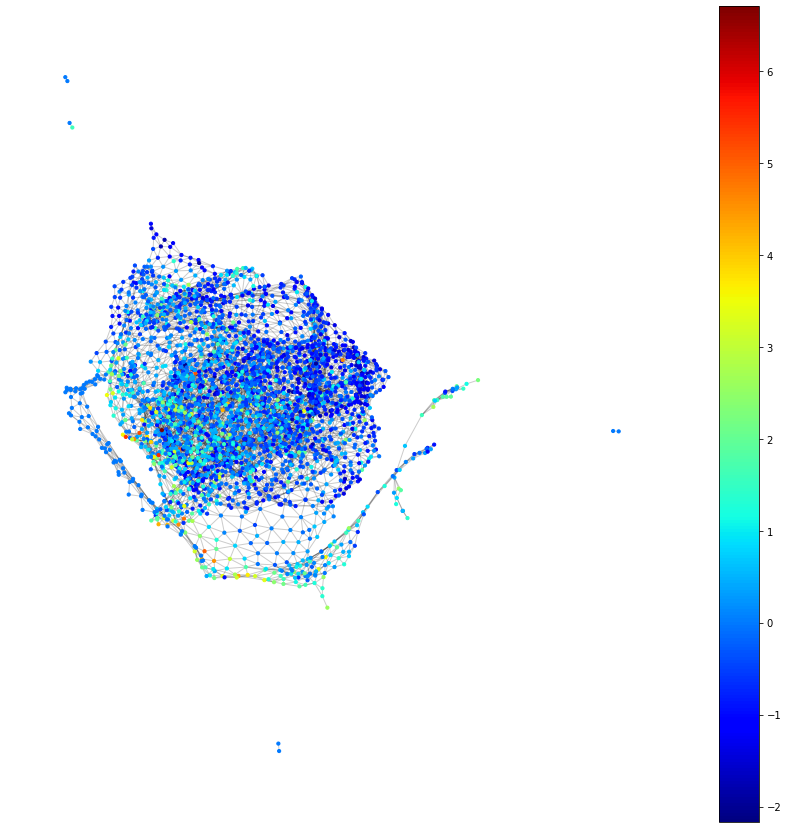

In [ ]:
G = nx.Graph()
G.add_nodes_from(node_ls)
G.add_edges_from(edge)

pos = nx.spring_layout(G)
plt.figure(3,figsize=(15,15))
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos,node_color = feats[:,0], node_size=10, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.axis('off')
plt.show()
# nx.draw_networkx_nodes(G, pos = pos, node_color= feats[:,0],node_size=15)


In [ ]:
print(G)

Graph with 3224 nodes and 9483 edges


Graph with 5 nodes and 10 edges


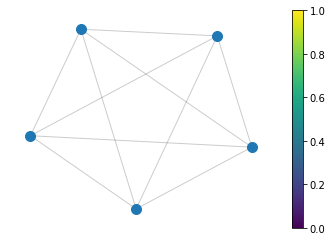

In [ ]:
G = nx.complete_graph(5)
print(G)
pos2 = nx.spring_layout(G)
# nx.draw(G, edge_color=[10]*10)

pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos2, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos2, node_size=100, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.axis('off')
plt.show()

tensor(-0.0012)
tensor(1.0005)
tensor(-0.0002)
tensor(1.0015)


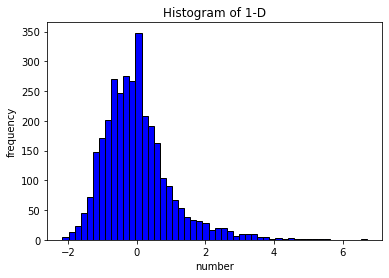

In [ ]:
# matplotlib histogram
plt.hist(feats[:,0], color = 'blue', edgecolor = 'black',bins = 50)

plt.title('Histogram of 1-D')
plt.xlabel('number')
plt.ylabel('frequency')

print(torch.mean(feats[:,0]))
print(torch.std(feats[:,0]))

print(torch.mean(feats[:,1]))
print(torch.std(feats[:,1]))

Text(0, 0.5, 'frequency')

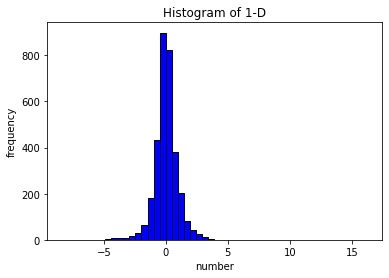

In [ ]:
# matplotlib histogram
plt.hist(feats[:,1], color = 'blue', edgecolor = 'black',bins = 50)

# Add labels
plt.title('Histogram of 1-D')
plt.xlabel('number')
plt.ylabel('frequency')

**create a dataset**

In [ ]:
data = Data(x=feats[:,:], edge_index=edge_idx).to(device)
# data = Data(x=torch.unsqueeze(feats[:,0],dim = -1), edge_index=edge_idx).to(device)
data2 = copy.deepcopy(data).to(device)
N = data.x.shape[0]
tr_num= int(N * 0.9)

# split train and validation
train_id,test_id = torch.utils.data.random_split(range(N), [tr_num, N-tr_num], generator=torch.Generator().manual_seed(42))
train_id = torch.tensor(sorted(train_id.indices))
test_id = torch.tensor(sorted(test_id.indices))

# input graph
data2.x = torch.normal(0, 0.1, size=data.x.shape, generator=torch.Generator().manual_seed(42)).to(device)
# data2.x = torch.rand(data.x.shape, generator=torch.Generator().manual_seed(42)).to(device)/10

# original validation
print(data.x[test_id])

# blocked validation
print(data2.x[test_id])

tensor([[-0.0710,  0.0755,  0.4942, -0.2736,  0.1955,  0.1961],
        [-1.5004, -1.5065,  0.3766,  1.1714, -0.6935,  1.6076],
        [-0.6745,  0.0370,  0.0630,  0.9952, -0.4150,  0.1961],
        ...,
        [ 0.0000,  0.0000,  0.0000,  0.0000, -0.7792,  2.5057],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0563,  2.6340],
        [ 0.0000,  0.0000,  0.0000,  0.0000, -0.2972,  4.3021]],
       device='cuda:0')
tensor([[-0.1049,  0.0604, -0.1722, -0.0828,  0.1335,  0.0484],
        [-0.1806,  0.0925, -0.0375,  0.1033, -0.0687,  0.0637],
        [ 0.0025, -0.0346,  0.0287, -0.0731,  0.0175, -0.1094],
        ...,
        [ 0.0260, -0.1559,  0.0754, -0.0278, -0.0755,  0.0588],
        [-0.1027,  0.0104, -0.0344, -0.2127, -0.0206, -0.0730],
        [-0.0005, -0.0349,  0.1327,  0.2379,  0.1331, -0.1442]],
       device='cuda:0')


**Node Attribute Magnify (Election data) to against added noise**



In [ ]:
data3 = copy.deepcopy(data).to(device)

# magnify original one 20 times
data3.x = 1*data3.x

print(data3.x[train_id,:])

tensor([[ 0.3903,  0.4151,  0.2198, -0.2736,  0.6561, -0.1460],
        [ 0.5457,  1.6653, -0.1722, -0.3441,  1.0417, -0.0605],
        [-1.3117, -1.3984, -0.4074,  0.0084, -1.0041,  1.2226],
        ...,
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.3241,  5.7135],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       device='cuda:0')


In [ ]:
data4 = copy.deepcopy(data3).to(device)
# nomally distributed noise with 0 mean and std = 0.1
# da3_noise = torch.normal(0,0.1, size=data3.x.shape,generator=torch.Generator().manual_seed(1234)).to(device)
da3_noise = torch.rand(data.x.shape, generator=torch.Generator().manual_seed(12345)).to(device)/10
# add the noise
data4.x = torch.round(data4.x + da3_noise, decimals = 2)

print(data3.x[train_id,:])
print(data4.x[train_id,:])

tensor([[ 0.3903,  0.4151,  0.2198, -0.2736,  0.6561, -0.1460],
        [ 0.5457,  1.6653, -0.1722, -0.3441,  1.0417, -0.0605],
        [-1.3117, -1.3984, -0.4074,  0.0084, -1.0041,  1.2226],
        ...,
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.3241,  5.7135],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       device='cuda:0')
tensor([[ 0.4900,  0.5000,  0.3200, -0.2300,  0.6600, -0.1300],
        [ 0.5800,  1.7200, -0.1400, -0.3200,  1.0900,  0.0200],
        [-1.2200, -1.3700, -0.3900,  0.0600, -0.9300,  1.3000],
        ...,
        [ 0.0300,  0.0600,  0.0100,  0.0900,  0.4200,  5.7400],
        [ 0.0200,  0.0900,  0.1000,  0.0200,  0.0900,  0.0200],
        [ 0.0800,  0.0500,  0.0100,  0.0200,  0.0400,  0.0600]],
       device='cuda:0')


#**Build up GNNs**

# **2. Inpainting**

**plot function**

In [ ]:
def plot_results(epochs, tr_loss, te_loss, title):
    
    fig1 = plt.figure(figsize=(7,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    axes = plt.gca()
    # axes.set_ylim([0,500])
    plt.plot(tr_loss)
    plt.plot(te_loss)
    plt.legend(['Training','Validation'])
    plt.title(title)
    min_val = torch.min(te_loss)
    min_idx = torch.argmin(te_loss)
    plt.axhline( y = min_val, color = 'red', linestyle = 'dashed', alpha=0.5)
    plt.axvline( min_idx, color = 'red', linestyle = 'dashed', alpha=0.5)
    plt.show()
    fig1.savefig(title)

# 2.0 Baseline

In [ ]:
# baseline: estimate the validation using the mean of all training
est_attr = torch.mean(data.x[train_id], dim = 0)

# MSE for validation
loss_est_attr = torch.mean((data.x[train_id]-est_attr)**2)
loss_est_attr

tensor(1.0059, device='cuda:0')

**LP**

In [ ]:
import torch
import time


def cg_batch(A_bmm, B, M_bmm=None, X0=None, rtol=1e-3, atol=0., maxiter=None, verbose=False):
    """Solves a batch of PD matrix linear systems using the preconditioned CG algorithm.
    This function solves a batch of matrix linear systems of the form
        A_i X_i = B_i,  i=1,...,K,
    where A_i is a n x n positive definite matrix and B_i is a n x m matrix,
    and X_i is the n x m matrix representing the solution for the ith system.
    Args:
        A_bmm: A callable that performs a batch matrix multiply of A and a K x n x m matrix.
        B: A K x n x m matrix representing the right hand sides.
        M_bmm: (optional) A callable that performs a batch matrix multiply of the preconditioning
            matrices M and a K x n x m matrix. (default=identity matrix)
        X0: (optional) Initial guess for X, defaults to M_bmm(B). (default=None)
        rtol: (optional) Relative tolerance for norm of residual. (default=1e-3)
        atol: (optional) Absolute tolerance for norm of residual. (default=0)
        maxiter: (optional) Maximum number of iterations to perform. (default=5*n)
        verbose: (optional) Whether or not to print status messages. (default=False)
    """
    K, n, m = B.shape

    if M_bmm is None:
        M_bmm = lambda x: x
    if X0 is None:
        X0 = M_bmm(B)
    if maxiter is None:
        maxiter = 5 * n

    assert B.shape == (K, n, m)
    assert X0.shape == (K, n, m)
    assert rtol > 0 or atol > 0
    assert isinstance(maxiter, int)

    X_k = X0
    R_k = B - A_bmm(X_k)
    Z_k = M_bmm(R_k)

    P_k = torch.zeros_like(Z_k)

    P_k1 = P_k
    R_k1 = R_k
    R_k2 = R_k
    X_k1 = X0
    Z_k1 = Z_k
    Z_k2 = Z_k

    B_norm = torch.norm(B, dim=1)
    stopping_matrix = torch.max(rtol*B_norm, atol*torch.ones_like(B_norm))

    if verbose:
        print("%03s | %010s %06s" % ("it", "dist", "it/s"))

    optimal = False
    start = time.perf_counter()
    for k in range(1, maxiter + 1):
        start_iter = time.perf_counter()
        Z_k = M_bmm(R_k)

        if k == 1:
            P_k = Z_k
            R_k1 = R_k
            X_k1 = X_k
            Z_k1 = Z_k
        else:
            R_k2 = R_k1
            Z_k2 = Z_k1
            P_k1 = P_k
            R_k1 = R_k
            Z_k1 = Z_k
            X_k1 = X_k
            denominator = (R_k2 * Z_k2).sum(1)
            denominator[denominator == 0] = 1e-8
            beta = (R_k1 * Z_k1).sum(1) / denominator
            P_k = Z_k1 + beta.unsqueeze(1) * P_k1

        denominator = (P_k * A_bmm(P_k)).sum(1)
        denominator[denominator == 0] = 1e-8
        alpha = (R_k1 * Z_k1).sum(1) / denominator
        X_k = X_k1 + alpha.unsqueeze(1) * P_k
        R_k = R_k1 - alpha.unsqueeze(1) * A_bmm(P_k)
        end_iter = time.perf_counter()

        residual_norm = torch.norm(A_bmm(X_k) - B, dim=1)

        if verbose:
            print("%03d | %8.4e %4.2f" %
                  (k, torch.max(residual_norm-stopping_matrix),
                    1. / (end_iter - start_iter)))

        if (residual_norm <= stopping_matrix).all():
            optimal = True
            break

    end = time.perf_counter()

    if verbose:
        if optimal:
            print("Terminated in %d steps (optimal). Took %.3f ms." %
                  (k, (end - start) * 1000))
        else:
            print("Terminated in %d steps (reached maxiter). Took %.3f ms." %
                  (k, (end - start) * 1000))


    info = {
        "niter": k,
        "optimal": optimal
    }

    return X_k, info


class CG(torch.autograd.Function):

    def __init__(self, A_bmm, M_bmm=None, rtol=1e-3, atol=0., maxiter=None, verbose=False):
        self.A_bmm = A_bmm
        self.M_bmm = M_bmm
        self.rtol = rtol
        self.atol = atol
        self.maxiter = maxiter
        self.verbose = verbose

    def forward(self, B, X0=None):
        X, _ = cg_batch(self.A_bmm, B, M_bmm=self.M_bmm, X0=X0, rtol=self.rtol,
                     atol=self.atol, maxiter=self.maxiter, verbose=self.verbose)
        return X

    def backward(self, dX):
        dB, _ = cg_batch(self.A_bmm, dX, M_bmm=self.M_bmm, rtol=self.rtol,
                      atol=self.atol, maxiter=self.maxiter, verbose=self.verbose)
        return 

class NeighborMean(MessagePassing):
    def __init__(self):
        super().__init__(aggr="mean")

    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)

def lp(graph, **kwargs):
    # test_mask = np.logical_not(graph.mask.cpu().numpy())
    labeled_y = graph.x.clone()
    labeled_y[test_id, :] = 0. # Set unobserved to 0

    nm_layer = NeighborMean()
    rhs = nm_layer(labeled_y, graph.edge_index)[test_id,:]

    # Apply matrix (I - P_uu) to a vector
    graph_input = torch.zeros_like(graph.x)
    def apply_mat(v):
        graph_input[test_id,:] = v

        mean_res = nm_layer(graph_input, graph.edge_index)[test_id,:]
        return v - mean_res

    apply_mat_batched = (lambda v: apply_mat(v[0]).unsqueeze(0))

    # CG
    solution, cg_info = cg_batch(apply_mat_batched, rhs.unsqueeze(0), rtol=1e-4)
    print("CG finished in {} iterations, solution optimal: {}".format(
        cg_info["niter"], cg_info["optimal"]))

    pred_mean = solution[0,:,:].cpu().numpy()

    return pred_mean, None

In [ ]:
tt = lp(data)
torch.mean((torch.tensor(tt[0]).to(device) - data.x[test_id,:])**2)

CG finished in 1615 iterations, solution optimal: False


tensor(0.7428, device='cuda:0')

In [ ]:
def my_lp(graph, **kwargs):

  graph_copy = copy.deepcopy(graph).to(device)
  graph_copy.x[test_id,:] = 0 # set unobserved to 0

  nm_layer = NeighborMean()
  est_y = nm_layer(graph_copy.x, graph_copy.edge_index)[test_id,:]

  return est_y

In [ ]:
torch.mean((my_lp(data) - data.x[test_id,:])**2)

tensor(0.7052, device='cuda:0')

#2.1 Pure GCN

In [ ]:
# GCN encoder and decoder
class My_GCN_model(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
      super(My_GCN_model,self).__init__()

      self.enc1 = torch_geometric.nn.GCNConv(input_dim,hidden_dim[0])
      self.enc2 = torch_geometric.nn.GCNConv(hidden_dim[0],hidden_dim[1])
      # self.enc3 = torch_geometric.nn.GCNConv(hidden_dim[1],hidden_dim[2])
      # self.enc4 = torch_geometric.nn.GCNConv(hidden_dim[2],hidden_dim[3])
      # self.enc5 = torch_geometric.nn.GCNConv(hidden_dim[3],hidden_dim[4])

      self.dec6 = torch_geometric.nn.GCNConv(hidden_dim[1],output_dim)

    def recon_loss(self, x_hat, target):
      # loss
      # loss = torch.sqrt(torch.sum((x_hat-target)**2))
      loss = torch.mean((x_hat-target)**2)
      return loss

    def forward(self,x,edge_index):
      m = nn.LeakyReLU(0.1)
      z = m(self.enc1(x, edge_index))
      z = m(self.enc2(z, edge_index))
      # z = m(self.enc3(z, edge_index))
      # z = m(self.enc4(z, edge_index))
      # z = m(self.enc5(z, edge_index))

      x_hat = self.dec6(z, edge_index)

      return x_hat

**New way of define GNN**

In [ ]:
LAYERS = {
    "gcn": torch_geometric.nn.GCNConv,
    "gat": torch_geometric.nn.GATConv,
}

class My_GCN_model_2(nn.Module):
    def __init__(self, layer_type, input_dim, output_dim, hidden_dim, n_layers):
      super(My_GCN_model_2,self).__init__()

      self.layer_class = LAYERS[layer_type]

      layer_list = []
      layer_list.append(self.layer_class(input_dim, hidden_dim))

      for _ in range(1, n_layers - 1):
        layer_list.append(torch.nn.LeakyReLU(0.1))
        layer_list.append(self.layer_class(hidden_dim,hidden_dim))

      layer_list.append(torch.nn.LeakyReLU(0.1))
      layer_list.append(self.layer_class(hidden_dim,output_dim))

      self.layers = torch.nn.ModuleList(layer_list)

    def recon_loss(self, x_hat, target):
      # loss
      loss = torch.mean((x_hat-target)**2)
      return loss

    def forward(self,x,edge_index):

      for layer in self.layers:
        if type(layer) == self.layer_class:
                x = layer(x, edge_index)
        else:
                x = layer(x)

      return x

**Train on 6 features**

**new GCN**

In [ ]:
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]
hidden_dim = [512,256]

# set epochs
epochs = 10000

# build up model
GCN_model_2 = My_GCN_model_2(layer_type = 'gcn', input_dim = in_channels, output_dim = out_channels, hidden_dim=128, n_layers= 3)
GCN_model_2 = GCN_model_2.to(device)

# prepare the blocked data and real data
x_input = data2.x.to(device)
train_pos_edge_index = data2.edge_index.to(device)
x_real = data.x.to(device)

# set optimizer
optimizer = torch.optim.Adam(GCN_model_2.parameters(), lr=0.0005)  # 0.0008 election data
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)

In [ ]:
list(range(1,2))

[1]

**old GCN**

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]
hidden_dim = [128,128]

# set epochs
epochs = 10000

# build up model
GCN_model = My_GCN_model(input_dim = in_channels, output_dim = out_channels, hidden_dim = hidden_dim)
GCN_model = GCN_model.to(device)

# prepare the blocked data and real data
x_input = data2.x.to(device)
train_pos_edge_index = data2.edge_index.to(device)
x_real = data.x.to(device)

# set optimizer
optimizer = torch.optim.Adam(GCN_model.parameters(), lr=0.0005)  # 0.0008 election data
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)

In [ ]:
# Set training function
def train_GCN(autoencoder, x_input, x_real,epochs=epochs):
    opt = optimizer
    tr_losses = []
    te_losses = []
    tr_loss= 100000

    # run epoch
    for epoch in range(epochs):

      # clean the gradient
      opt.zero_grad()

      # forward propagate
      x_hat = autoencoder(x_input, train_pos_edge_index)

      # calculate the loss for train and validation
      tr_loss = autoencoder.recon_loss(x_hat[train_id,:],x_real[train_id,:])
      te_loss = autoencoder.recon_loss(x_hat[test_id,:],x_real[test_id,:])

      # back propagate the training loss
      tr_loss.backward()

      # update networks parameters
      opt.step()

      # set gradient cliping
      torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.01, norm_type=2.0)  # 0.01 election data

      # record training and validation loss
      tr_losses.append(tr_loss.tolist())
      te_losses.append(te_loss.tolist())

      if (epoch % 1000) == 0:
        print('Epoch: {:03d}, tr_loss: {:.4f}, te_loss: {:.4f}'.format(epoch,tr_loss,te_loss))
    return autoencoder,tr_losses,te_losses

In [ ]:
GCN_model,tr_losses,te_losses = train_GCN(GCN_model_2, x_input,x_real,epochs=epochs)

<ipython-input-15-056c9b310d17>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.01, norm_type=2.0)  # 0.01 election data


Epoch: 000, tr_loss: 1.0064, te_loss: 0.9668
Epoch: 1000, tr_loss: 0.6702, te_loss: 0.7697
Epoch: 2000, tr_loss: 0.5908, te_loss: 0.7330
Epoch: 3000, tr_loss: 0.5495, te_loss: 0.7214
Epoch: 4000, tr_loss: 0.5218, te_loss: 0.7150
Epoch: 5000, tr_loss: 0.5015, te_loss: 0.7086
Epoch: 6000, tr_loss: 0.4863, te_loss: 0.7068
Epoch: 7000, tr_loss: 0.4731, te_loss: 0.7043
Epoch: 8000, tr_loss: 0.4623, te_loss: 0.7014
Epoch: 9000, tr_loss: 0.4539, te_loss: 0.7016


In [ ]:
print("------------------train data comparison----------------",'\n')
print("--------real value--------",'\n')
print(data.x[train_id[0:15],:])
print("--------estimated value--------",'\n')
print(GCN_model(x_input,train_pos_edge_index)[train_id[0:15],:])

print('\n')
print("-------------------test data comparison---------------",'\n')
print("--------real value--------",'\n')
print(data.x[test_id[0:15],:])
print("--------estimated value--------",'\n')
print(GCN_model(x_input,train_pos_edge_index)[test_id[0:15],:])

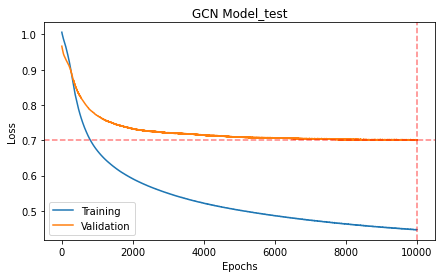

tensor(0.6996)


In [ ]:
plot_results(epochs, torch.tensor(tr_losses), torch.tensor(te_losses),'GCN Model_test')
print(torch.min(torch.tensor(te_losses)))

**Different hidden size**

In [ ]:
# different model complexity
HYPER_CONFIG = [[32,32],
                [64,64],
                [128,128],
                [256,256],
                [512,512],
                [768,768]]

res_mat = torch.empty(size = (24,5))
# print(res_mat)
for i in range(24):
  min_list = []
  for hyper_str in HYPER_CONFIG:
    model_tt = My_GCN_model(input_dim = in_channels, output_dim = out_channels, hidden_dim = hyper_str)
    model_tt = model_tt.to(device)
    optimizer = torch.optim.Adam(model_tt.parameters(), lr=0.0005)  # 0.0008 election data
    model_tt,tr_losses_tt,te_losses_tt = train_GCN(model_tt, x_input,x_real,epochs=8000)
    min_val = np.min(te_losses_tt)
    min_list.append(min_val)
    # min_list.append(hyper_str[0])
  res_mat[i,:] = torch.tensor(min_list)

print(res_mat)
torch.save(res_mat, 'comlexity result matrix.pt')

          MSE  Hidden Dimension
0    0.782034              32.0
1    0.821078              32.0
2    0.768982              32.0
3    0.794567              32.0
4    0.779743              32.0
..        ...               ...
115  0.657502             512.0
116  0.661144             512.0
117  0.653496             512.0
118  0.658384             512.0
119  0.661458             512.0

[120 rows x 2 columns]


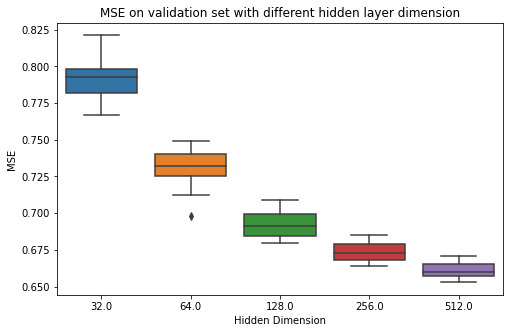

In [ ]:
res_mat = torch.load('comlexity result matrix.pt')
import seaborn as sns
aa = np.array(res_mat)
aa = aa.flatten('F')
bb = np.array(np.repeat([32,64,128,256,512],24),dtype=int)
cc = pd.DataFrame(np.array([aa,bb])).T
cc = cc.rename(columns={0: 'MSE', 1: 'Hidden Dimension'})
print(cc)
fig2 = plt.figure(figsize=(8,5))
sns.boxplot(data=cc, x="Hidden Dimension", y="MSE")
plt.title('MSE on validation set with different hidden layer dimension')
fig2.savefig("Hidden Dimension.png")

**Different model depth**

In [ ]:
# different model depth
HYPER_CONFIG = [2,3,4,5,6,7]

res_mat_2 = torch.empty(size = (24, 6))
# print(res_mat)
for i in range(24):
  min_list = []
  for hyper_str in HYPER_CONFIG:
    model_tt = My_GCN_model_2(layer_type = 'gcn', input_dim = in_channels, output_dim = out_channels, hidden_dim=128, n_layers= hyper_str)
    model_tt = model_tt.to(device)
    optimizer = torch.optim.Adam(model_tt.parameters(), lr=0.0005)  # 0.0008 election data
    model_tt,tr_losses_tt,te_losses_tt = train_GCN(model_tt, x_input,x_real,epochs=8000)
    min_val = np.min(te_losses_tt)
    min_list.append(min_val)
    # min_list.append(hyper_str[0])
  res_mat_2[i,:] = torch.tensor(min_list)

print(res_mat_2)
torch.save(res_mat_2, 'comlexity result matrix (deep model).pt')

          MSE  Hidden depth
0    0.799056           2.0
1    0.830513           2.0
2    0.836189           2.0
3    0.831372           2.0
4    0.829746           2.0
..        ...           ...
139  0.646974           7.0
140  0.631053           7.0
141  0.635404           7.0
142  0.642841           7.0
143  0.646554           7.0

[144 rows x 2 columns]


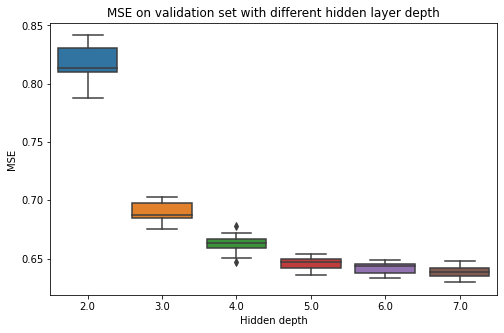

In [ ]:
import seaborn as sns
aa = np.array(res_mat_2)
aa = aa.flatten('F')
bb = np.array(np.repeat([2,3,4,5,6,7],24),dtype=int)
cc = pd.DataFrame(np.array([aa,bb])).T
cc = cc.rename(columns={0: 'MSE', 1: 'Hidden depth'})
print(cc)
fig2 = plt.figure(figsize=(8,5))
sns.boxplot(data=cc, x="Hidden depth", y="MSE")
plt.title('MSE on validation set with different hidden layer depth')
fig2.savefig("Hidden depth.png")

In [ ]:
node_ls_est = []
est_node_att = GCN_model(x_input,train_pos_edge_index).to('cpu')
for num,feat1 in zip(range(N),est_node_att[:,0]):
  node_ls_est.append((num, {'feat1': feat1}))

In [ ]:
G2 = nx.Graph()
G2.add_nodes_from(node_ls_est)
G2.add_edges_from(edge)

pos2 = nx.spring_layout(G2)
plt.figure(figsize=(15,15))
ec2 = nx.draw_networkx_edges(G2, pos2, alpha=0.2)
nc2 = nx.draw_networkx_nodes(G2, pos2,node_color = est_node_att[:,0], node_size=10, cmap=plt.cm.jet)
plt.colorbar(nc2)
plt.axis('off')
plt.show()

**Train on 1 feature**

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 30000

# build up model
GCN_model_2 = My_GCN_model(input_dim = in_channels, output_dim = out_channels)
GCN_model_2 = GCN_model_2.to(device)

# prepare the blocked data and real data
x_input = data2.x.to(device)
train_pos_edge_index = data2.edge_index.to(device)
x_real = data.x.to(device)

# set optimizer
optimizer = torch.optim.Adam(GCN_model_2.parameters(), lr=0.002)  # 0.0008 election data
# optimizer = torch.optim.SGD(GCN_model_2.parameters(), lr=0.00005, momentum=0.3)

In [ ]:
GCN_model_2,tr_losses_GCN_2,te_losses_GCN_2 = train_GCN(GCN_model_2, x_input,x_real,epochs=epochs)

In [ ]:
print("------------------train data comparison----------------",'\n')
print("--------real value--------",'\n')
print(data.x[train_id[0:15],:])
print("--------estimated value--------",'\n')
print(GCN_model_2(x_input,train_pos_edge_index)[train_id[0:15],:])

print('\n')
print("-------------------test data comparison---------------",'\n')
print("--------real value--------",'\n')
print(data.x[test_id[0:15],:])
print("--------estimated value--------",'\n')
print(GCN_model_2(x_input,train_pos_edge_index)[test_id[0:15],:])

------------------train data comparison---------------- 

--------real value-------- 

tensor([[ 0.3903],
        [ 0.5457],
        [-1.3117],
        [-0.5085],
        [-0.1828],
        [-1.2018],
        [-1.1127],
        [-0.6110],
        [-0.7881],
        [-0.6363],
        [-0.4211],
        [-1.3269],
        [-1.2189],
        [-0.8683],
        [-0.4766]], device='cuda:0')
--------estimated value-------- 

tensor([[ 0.3478],
        [-0.0846],
        [-0.0589],
        [ 0.2190],
        [-0.3164],
        [ 0.1310],
        [-0.4216],
        [-0.5091],
        [ 0.3466],
        [-0.1751],
        [ 0.1437],
        [-0.1540],
        [-0.8211],
        [-0.1706],
        [-0.5221]], device='cuda:0', grad_fn=<IndexBackward0>)


-------------------test data comparison--------------- 

--------real value-------- 

tensor([[-0.8769],
        [-1.8100],
        [-1.0687],
        [-0.9421],
        [-0.1488],
        [-0.9760],
        [-0.9380],
        [-1.7821],
       

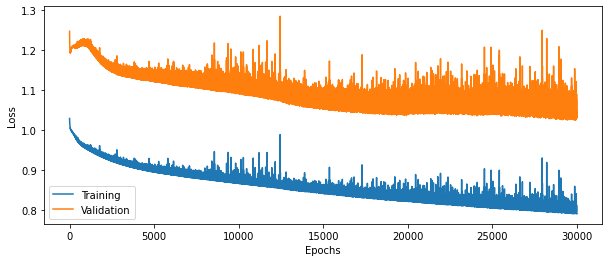

In [ ]:
plot_results(epochs, torch.tensor(tr_losses_GCN_2), torch.tensor(te_losses_GCN_2))

# 2.2 Pure GAT

In [ ]:
# GCN encoder and decoder
class My_GAT_model(nn.Module):
    def __init__(self, input_dim, output_dim,hidden_dim,head_num):
      super(My_GAT_model,self).__init__()
      self.enc1 = torch_geometric.nn.GATConv(input_dim,hidden_dim[0],heads = head_num)
      self.enc2 = torch_geometric.nn.GATConv(hidden_dim[0]*head_num,hidden_dim[1],heads = head_num)
      # self.enc3 = torch_geometric.nn.GATConv(D[1]*3,D[2],heads = 3)
      # self.enc4 = torch_geometric.nn.GATConv(D[2]*3,D[3],heads = 3)
      # self.enc5 = torch_geometric.nn.GATConv(D[3]*3,D[4],heads = 3)
      # self.enc6 = torch_geometric.nn.GATConv(D[4],D[5])

      self.dec6 = torch_geometric.nn.GATConv(hidden_dim[1]*head_num,output_dim,heads = 1)

    def recon_loss(self, x_hat, target):
      # loss
      # loss = torch.sqrt(torch.sum((x_hat-target)**2))
      loss = torch.mean((x_hat-target)**2)
      return loss

    def forward(self,x,edge_index):
      m = nn.LeakyReLU(0.1)
      z = m(self.enc1(x, edge_index))
      z = m(self.enc2(z, edge_index))
      # z = m(self.enc3(z, edge_index))
      # z = m(self.enc4(z, edge_index))
      # z = m(self.enc5(z, edge_index))
      # z = m(self.enc6(z, edge_index))

      x_hat = self.dec6(z, edge_index)

      return x_hat

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]
hidden_dim = [512,256]

# set epochs
epochs = 8000

# build up model
GAT_model = My_GAT_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = hidden_dim, head_num = 3)
GAT_model = GAT_model.to(device)

# prepare the blocked data and real data
x_input = data2.x.to(device)
train_pos_edge_index = data2.edge_index.to(device)
x_real = data.x.to(device)

# set optimizer
optimizer = torch.optim.Adam(GAT_model.parameters(), lr=0.0005) # 0.00008
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)

In [ ]:
GAT_model,tr_losses_GAT,te_losses_GAT = train_GCN(GAT_model, x_input,x_real,epochs=epochs)

<ipython-input-13-056c9b310d17>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.01, norm_type=2.0)  # 0.01 election data


Epoch: 000, tr_loss: 1.0061, te_loss: 0.9667
Epoch: 1000, tr_loss: 0.4248, te_loss: 0.6704
Epoch: 2000, tr_loss: 0.3358, te_loss: 0.6971
Epoch: 3000, tr_loss: 0.2917, te_loss: 0.7372
Epoch: 4000, tr_loss: 0.2660, te_loss: 0.7642
Epoch: 5000, tr_loss: 0.2479, te_loss: 0.7937
Epoch: 6000, tr_loss: 0.2328, te_loss: 0.8234
Epoch: 7000, tr_loss: 0.2234, te_loss: 0.8345


In [ ]:
print("------------------train data comparison----------------",'\n')
print("--------real value--------",'\n')
print(data.x[train_id[0:15],:])
print("--------estimated value--------",'\n')
print(GAT_model(x_input,train_pos_edge_index)[train_id[0:15],:])

print('\n')
print("-------------------test data comparison---------------",'\n')
print("--------real value--------",'\n')
print(data.x[test_id[0:15],:])
print("--------estimated value--------",'\n')
print(GAT_model(x_input,train_pos_edge_index)[test_id[0:15],:])

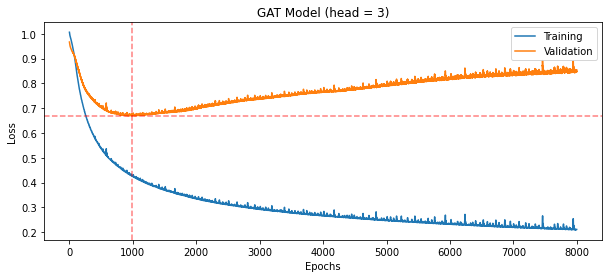

tensor(0.6695)


In [ ]:
plot_results(epochs, (torch.tensor(tr_losses_GAT)), (torch.tensor(te_losses_GAT)), 'GAT Model (head = 3)')
print(torch.min(torch.tensor(te_losses_GAT)))

In [ ]:
# build up model
GAT_model_h1 = My_GAT_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = hidden_dim, head_num = 1)
GAT_model_h1 = GAT_model_h1.to(device)

# set optimizer
optimizer = torch.optim.Adam(GAT_model_h1.parameters(), lr=0.0005) # 0.00008

In [ ]:
GAT_model_h1,tr_losses_GAT_h1,te_losses_GAT_h1 = train_GCN(GAT_model_h1, x_input,x_real,epochs=epochs)

<ipython-input-13-056c9b310d17>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.01, norm_type=2.0)  # 0.01 election data


Epoch: 000, tr_loss: 1.0058, te_loss: 0.9661
Epoch: 1000, tr_loss: 0.5701, te_loss: 0.7084
Epoch: 2000, tr_loss: 0.4890, te_loss: 0.6755
Epoch: 3000, tr_loss: 0.4521, te_loss: 0.6727
Epoch: 4000, tr_loss: 0.4303, te_loss: 0.6740
Epoch: 5000, tr_loss: 0.4117, te_loss: 0.6785
Epoch: 6000, tr_loss: 0.3999, te_loss: 0.6888
Epoch: 7000, tr_loss: 0.3841, te_loss: 0.6880


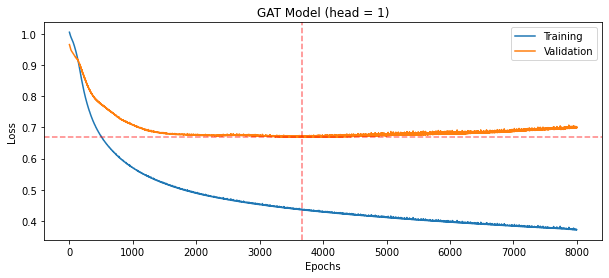

tensor(0.6685)


In [ ]:
plot_results(epochs, (torch.tensor(tr_losses_GAT_h1)), (torch.tensor(te_losses_GAT_h1)), 'GAT Model (head = 1)')
print(torch.min(torch.tensor(te_losses_GAT_h1)))

**Train on 1 feature**

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 30000

# build up model
GAT_model_2 = My_GAT_model(input_dim = in_channels, output_dim = out_channels)
GAT_model_2 = GAT_model_2.to(device)

# prepare the blocked data and real data
x_input = data2.x.to(device)
train_pos_edge_index = data2.edge_index.to(device)
x_real = data.x.to(device)

# set optimizer
optimizer = torch.optim.Adam(GAT_model_2.parameters(), lr=0.0005)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)

In [ ]:
GAT_model_2,tr_losses_GAT_2,te_losses_GAT_2 = train_GCN(GAT_model_2, x_input,x_real,epochs=epochs)

In [ ]:
print("------------------train data comparison----------------",'\n')
print("--------real value--------",'\n')
print(data.x[train_id[0:15],:])
print("--------estimated value--------",'\n')
print(GAT_model_2(x_input,train_pos_edge_index)[train_id[0:15],:])

print('\n')
print("-------------------test data comparison---------------",'\n')
print("--------real value--------",'\n')
print(data.x[test_id[0:15],:])
print("--------estimated value--------",'\n')
print(GAT_model_2(x_input,train_pos_edge_index)[test_id[0:15],:])

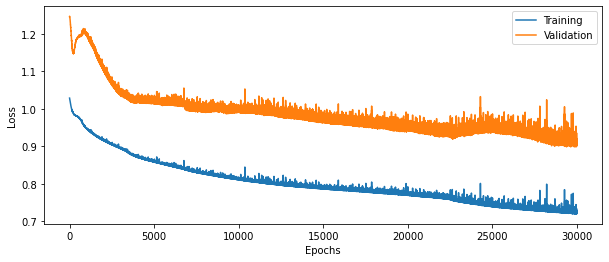

In [ ]:
plot_results(epochs, (torch.tensor(tr_losses_GAT_2)), (torch.tensor(te_losses_GAT_2)))

# 2.3 GraphSage

In [ ]:
# GSage encoder and decoder
class My_GSage_model(nn.Module):
    def __init__(self, input_dim, output_dim,hidden_dim):
      super(My_GSage_model,self).__init__()
      
      self.enc1 = torch_geometric.nn.SAGEConv(input_dim,hidden_dim[0])
      self.enc2 = torch_geometric.nn.SAGEConv(hidden_dim[0],hidden_dim[1])
      # self.enc3 = torch_geometric.nn.SAGEConv(hidden_dim[1],hidden_dim[2])
      # self.enc4 = torch_geometric.nn.SAGEConv(hidden_dim[2],hidden_dim[3])
      # self.enc5 = torch_geometric.nn.SAGEConv(hidden_dim[3],hidden_dim[4])
      # self.enc6 = torch_geometric.nn.SAGEConv(hidden_dim[4],hidden_dim[5])

      self.dec6 = torch_geometric.nn.SAGEConv(hidden_dim[1],output_dim)

    def recon_loss(self, x_hat, target):
      # loss
      # loss = torch.sqrt(torch.sum((x_hat-target)**2))
      loss = torch.mean((x_hat-target)**2)
      return loss

    def forward(self,x,edge_index):
      m = nn.LeakyReLU(0.1)
      z = m(self.enc1(x, edge_index))
      z = m(self.enc2(z, edge_index))
      # z = m(self.enc3(z, edge_index))
      # z = m(self.enc4(z, edge_index))
      # z = m(self.enc5(z, edge_index))
      # z = m(self.enc6(z, edge_index))

      x_hat = self.dec6(z, edge_index)

      return x_hat

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]
hidden_dim = [512,256]
# set epochs
epochs = 30000

# build up model
GSage_model = My_GSage_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = hidden_dim)
GSage_model = GSage_model.to(device)

# prepare the blocked data and real data
x_input = data2.x.to(device)
train_pos_edge_index = data2.edge_index.to(device)
x_real = data.x.to(device)

# set optimizer
optimizer = torch.optim.Adam(GSage_model.parameters(), lr=0.000008)
# optimizer = torch.optim.SGD(GSage_model.parameters(), lr=0.00005, momentum=0.3)

In [ ]:
GSage_model,tr_losses_GSage,te_losses_GSage = train_GCN(GSage_model, x_input,x_real,epochs=epochs)

<ipython-input-26-056c9b310d17>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.01, norm_type=2.0)  # 0.01 election data


Epoch: 000, tr_loss: 1.0061, te_loss: 0.9660
Epoch: 1000, tr_loss: 0.8503, te_loss: 0.8674
Epoch: 2000, tr_loss: 0.7698, te_loss: 0.8310
Epoch: 3000, tr_loss: 0.7156, te_loss: 0.8146
Epoch: 4000, tr_loss: 0.6688, te_loss: 0.8013
Epoch: 5000, tr_loss: 0.6274, te_loss: 0.7900
Epoch: 6000, tr_loss: 0.5903, te_loss: 0.7838
Epoch: 7000, tr_loss: 0.5571, te_loss: 0.7772
Epoch: 8000, tr_loss: 0.5264, te_loss: 0.7765
Epoch: 9000, tr_loss: 0.4991, te_loss: 0.7759
Epoch: 10000, tr_loss: 0.4752, te_loss: 0.7709
Epoch: 11000, tr_loss: 0.4504, te_loss: 0.7708
Epoch: 12000, tr_loss: 0.4312, te_loss: 0.7690
Epoch: 13000, tr_loss: 0.4110, te_loss: 0.7695
Epoch: 14000, tr_loss: 0.3938, te_loss: 0.7707
Epoch: 15000, tr_loss: 0.3776, te_loss: 0.7729
Epoch: 16000, tr_loss: 0.3644, te_loss: 0.7820
Epoch: 17000, tr_loss: 0.3495, te_loss: 0.7834
Epoch: 18000, tr_loss: 0.3352, te_loss: 0.7830
Epoch: 19000, tr_loss: 0.3229, te_loss: 0.7855
Epoch: 20000, tr_loss: 0.3124, te_loss: 0.7865
Epoch: 21000, tr_loss: 0

In [ ]:
print("------------------train data comparison----------------",'\n')
print("--------real value--------",'\n')
print(data.x[train_id[0:15],:])
print("--------estimated value--------",'\n')
print(GSage_model(x_input,train_pos_edge_index)[train_id[0:15],:])

print('\n')
print("-------------------test data comparison---------------",'\n')
print("--------real value--------",'\n')
print(data.x[test_id[0:15],:])
print("--------estimated value--------",'\n')
print(GSage_model(x_input,train_pos_edge_index)[test_id[0:15],:])

In [ ]:
plot_results(epochs, (torch.tensor(tr_losses_GSage)), (torch.tensor(te_losses_GSage)), 'GraphSAGE Model')
print(torch.min(torch.tensor(te_losses_GSage)))

NameError: ignored

# 2.4 UNet

Paper: http://proceedings.mlr.press/v97/gao19a.html

Graph pooling:

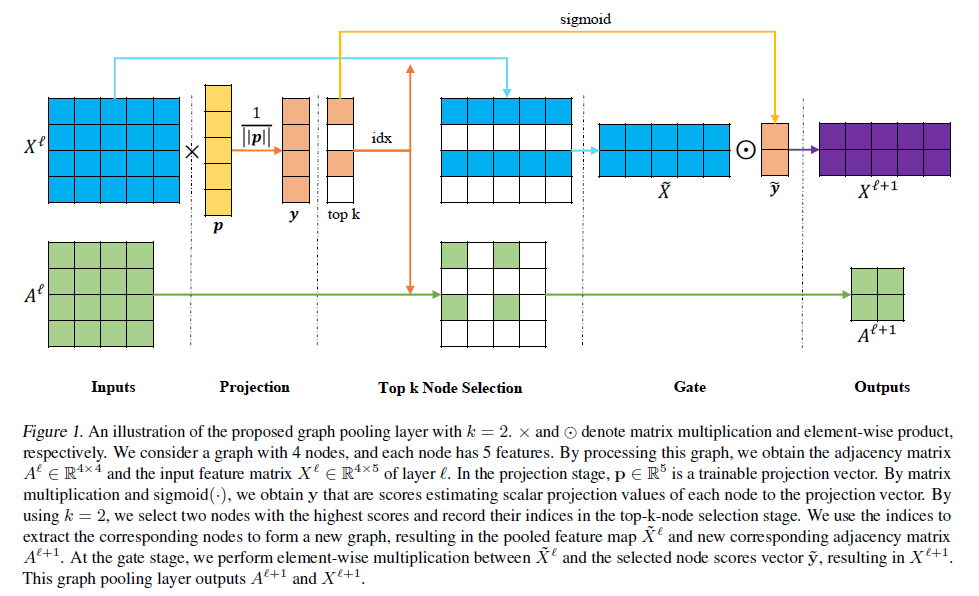

Graph Unpooling:

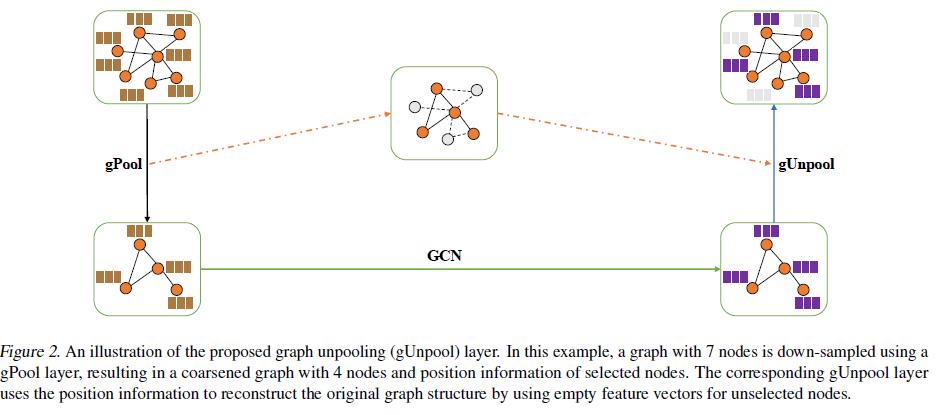

Overall Architecture:

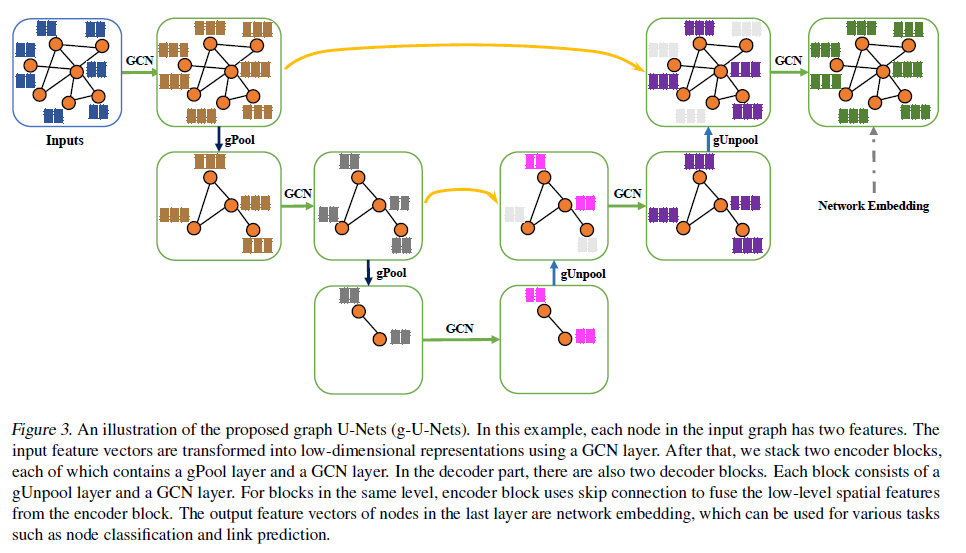

In [ ]:
# Model Class
class MyGraphUnet(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, depth):
        super(MyGraphUnet, self).__init__()
        self.unet = torch_geometric.nn.GraphUNet(in_channels, hidden_channels, out_channels, depth)

    def forward(self, x, edge_indx):
        out = self.unet(x, edge_indx)
        return out

    def recon_loss(self, x_hat, target):
      loss = torch.mean((x_hat-target)**2)
      return loss

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 30000

# build up model
model_Unet = MyGraphUnet(in_channels,128,out_channels,2)
model_Unet = model_Unet.to(device)

# prepare the blocked data and real data
x2 = data2.x.to(device)
train_edge_index = data2.edge_index.to(device)
x = data.x.to(device)

# set optimizer
optimizer = torch.optim.Adam(model_Unet.parameters(), lr=0.000015)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)

In [ ]:
# Set training function
def train_inpainting(autoencoder,x_train, x_ori, epochs=epochs):
    opt = optimizer
    tr_losses = []
    te_losses = []
    tr_loss= 100000

    # run epoch
    for epoch in range(epochs):

      # clean the gradient
      opt.zero_grad()

      # forward propagate
      x_hat = autoencoder(x_train, train_edge_index)

      # calculate the loss for train and validation
      tr_loss = autoencoder.recon_loss(x_hat[train_id,:],x_ori[train_id,:])
      te_loss = autoencoder.recon_loss(x_hat[test_id,:],x_ori[test_id,:])

      # back propagate the training loss
      tr_loss.backward()

      # update networks parameters
      opt.step()

      # set gradient cliping
      torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=1, norm_type=2.0)

      # record training and validation loss
      tr_losses.append(tr_loss.tolist())
      te_losses.append(te_loss.tolist())
      if (epoch % 1000 ) ==0:
        print('Epoch: {:03d}, tr_loss: {:.4f}, te_loss: {:.4f}'.format(epoch,tr_loss,te_loss))
    return autoencoder,tr_losses,te_losses

In [ ]:
Unet_model,tr_losses_unet,te_losses_unet = train_inpainting(model_Unet, x2, x, epochs=epochs)

<ipython-input-11-9a95cb84b9d9>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=1, norm_type=2.0)


Epoch: 000, tr_loss: 1.0064, te_loss: 0.9677
Epoch: 1000, tr_loss: 0.9941, te_loss: 0.9544
Epoch: 2000, tr_loss: 0.9716, te_loss: 0.9401
Epoch: 3000, tr_loss: 0.9448, te_loss: 0.9099
Epoch: 4000, tr_loss: 0.9176, te_loss: 0.8945
Epoch: 5000, tr_loss: 0.8934, te_loss: 0.8760
Epoch: 6000, tr_loss: 0.8759, te_loss: 0.8699
Epoch: 7000, tr_loss: 0.8582, te_loss: 0.8595
Epoch: 8000, tr_loss: 0.8391, te_loss: 0.8526
Epoch: 9000, tr_loss: 0.8215, te_loss: 0.8473
Epoch: 10000, tr_loss: 0.8012, te_loss: 0.8340
Epoch: 11000, tr_loss: 0.7877, te_loss: 0.8306
Epoch: 12000, tr_loss: 0.7741, te_loss: 0.8255
Epoch: 13000, tr_loss: 0.7619, te_loss: 0.8125
Epoch: 14000, tr_loss: 0.7486, te_loss: 0.8061
Epoch: 15000, tr_loss: 0.7355, te_loss: 0.8047
Epoch: 16000, tr_loss: 0.7240, te_loss: 0.7981
Epoch: 17000, tr_loss: 0.7125, te_loss: 0.7984
Epoch: 18000, tr_loss: 0.7032, te_loss: 0.7947
Epoch: 19000, tr_loss: 0.6952, te_loss: 0.7921
Epoch: 20000, tr_loss: 0.6893, te_loss: 0.7922
Epoch: 21000, tr_loss: 0

In [ ]:
print("------------------train data comparison----------------",'\n')
print(data.x[train_id[0:10],:])
print(Unet_model(x2,train_edge_index)[train_id[0:10],:])

print('\n')
print("-------------------test data comparison---------------",'\n')

print(data.x[test_id[0:10],:])
print(Unet_model(x2,train_edge_index)[test_id[0:10],:])

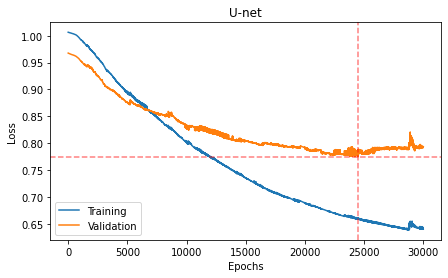

In [ ]:
plot_results(epochs, torch.tensor(tr_losses_unet), torch.tensor(te_losses_unet),'U-net')

#2.5 GALA ( Laplacian smoothing + Laplacian sharpening)

Paper: https://openaccess.thecvf.com/content_ICCV_2019/html/Park_Symmetric_Graph_Convolutional_Autoencoder_for_Unsupervised_Graph_Representation_Learning_ICCV_2019_paper.html

Architecture:

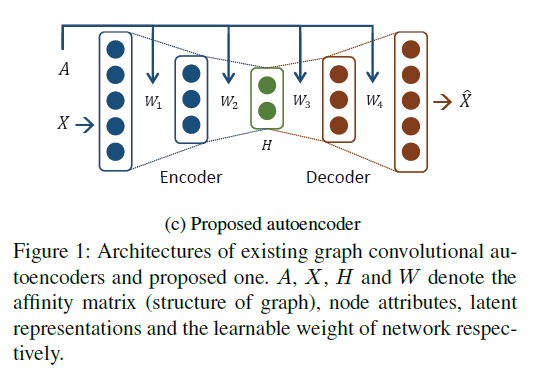

Laplacian Smoothing (Encoder) used:

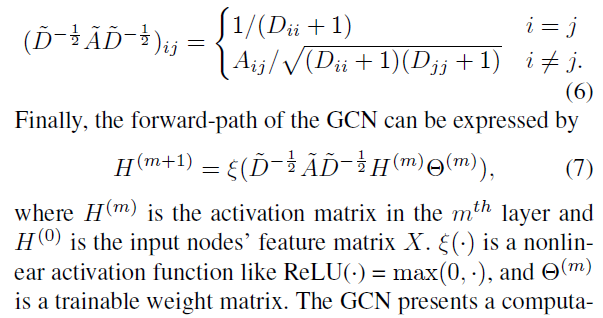

Laplacian Sharpening (Decoder) used:

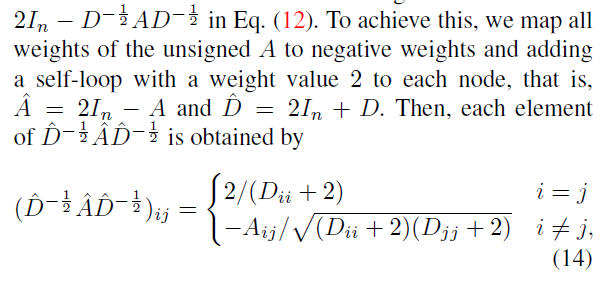

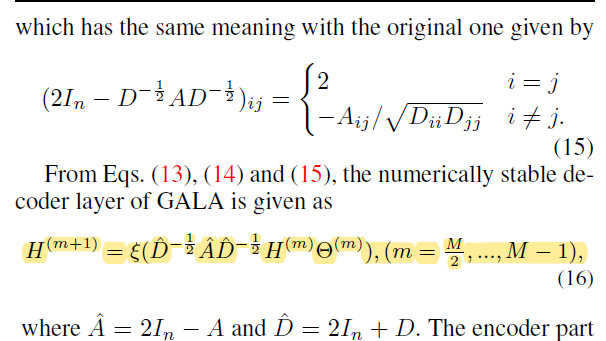

**Transform from original code**

In [ ]:
def get_affinity(edge_index: Tensor):    

    # output :
    # DAD: normalization matrix for Laplacian smoothing and sharpening in sparse form  (indices + value + dense shape)
    
    # put in CPU
    device2 = 'cpu'

    # generate adjacency matrix from edge index
    adj = torch_geometric.utils.to_dense_adj(edge_index).to(device2)

    # adjacency matrix for smoothing
    adj_sm = adj + torch.eye(adj[0].shape[0])

    # degree matrix
    D = torch.sqrt(torch.sum(adj_sm, -1,dtype = int)[0])

    # normalization matrix for smoothing in GALA
    D_sm = torch.diag(1/D)
    DAD_sm = torch.mm(torch.mm(D_sm, adj_sm[0]),D_sm).to_sparse()

    # adjacency matrix for sharpening
    adj_sp = 2 * torch.eye(adj_sm[0].shape[0]) - adj
    D = torch.sqrt(torch.sum(2*torch.eye(adj_sm[0].shape[0]) + adj, -1,dtype = int)[0])

    # normalization matrix for sharpenning in GALA
    D_sp = torch.diag(1/D)
    DAD_sp = torch.mm(torch.mm(D_sp, adj_sp[0]),D_sp).to_sparse()

    DAD = {'DADsm_indices' : DAD_sm.indices(), 'DADsm_values' : DAD_sm.values(), 
           'DADsp_indices' : DAD_sp.indices(), 'DADsp_values' : DAD_sp.values(), 'dense_shape' : torch.squeeze(adj).shape}
    
    # ORIGINAL CODE

    # Asm = A + eye
    # Dsm = 1/np.sqrt(np.sum(Asm, -1))
    # DADsm = ss.csr_matrix(np.multiply(np.multiply(Asm, Dsm).T, Dsm).reshape(-1))
    
    # Asp = 2*eye - A
    # Dsp = 1/np.sqrt(np.sum(2*eye + A, -1))
    # DADsp = ss.csr_matrix(np.multiply(np.multiply(Asp, Dsp).T, Dsp).reshape(-1))
    
    # DADsm_indices = np.vstack([DADsm.indices//A.shape[0],DADsm.indices%A.shape[0]]).T
    # DADsp_indices = np.vstack([DADsp.indices//A.shape[0],DADsp.indices%A.shape[0]]).T
    # DAD = {'DADsm_indices' : DADsm_indices, 'DADsm_values' : DADsm.data.astype(np.float32), 
    #        'DADsp_indices' : DADsp_indices, 'DADsp_values' : DADsp.data.astype(np.float32), 'dense_shape' : A.shape}
    # np.save('DAD.npy',DAD)

    return DAD

# test
DAD = get_affinity(data.edge_index)
DAD

{'DADsm_indices': tensor([[   0,    0,    0,  ..., 3232, 3233, 3233],
         [   0,   10,   23,  ..., 3233, 3232, 3233]]),
 'DADsm_values': tensor([0.1667, 0.1443, 0.1543,  ..., 0.5000, 0.5000, 0.5000]),
 'DADsp_indices': tensor([[   0,    0,    0,  ..., 3232, 3233, 3233],
         [   0,   10,   23,  ..., 3233, 3232, 3233]]),
 'DADsp_values': tensor([ 0.2857, -0.1260, -0.1336,  ..., -0.3333, -0.3333,  0.6667]),
 'dense_shape': torch.Size([3234, 3234])}

In [ ]:
# GALA class 1
class GALA(nn.Module):
    def __init__(self,DAD, input_channels,name = 'GALA', trainable = True):
        super(GALA, self).__init__()
        self.GALA = {}
        D = [800,700,500]

        # encoder layer
        self.GALA_enc1 = torch.nn.Linear(input_channels,out_features = D[0])
        self.GALA_enc2 = torch.nn.Linear(D[0],out_features = D[1])
        self.GALA_enc3 = torch.nn.Linear(D[1],out_features = D[2])

        # decoder layer
        self.GALA_dec1 = torch.nn.Linear(D[2],out_features = D[1])
        self.GALA_dec2 = torch.nn.Linear(D[1],out_features = D[0])
        self.GALA_dec3 = torch.nn.Linear(D[0],out_features = input_channels)
        
        # retrive DAD
        self.DADsm = torch.sparse_coo_tensor(DAD['DADsm_indices'], DAD['DADsm_values'], DAD['dense_shape'])
        self.DADsp = torch.sparse_coo_tensor(DAD['DADsp_indices'], DAD['DADsp_values'], DAD['dense_shape'])

    def Laplacian_smoothing(self, x, name): # not use
        # self.DADsm = self.DADsm.to(device)
        # print(self.GALA[name](x).device)
        return F.relu(torch.sparse.mm(self.DADsm, self.GALA[name](x).to_sparse()).to_dense())

    def Laplacian_sharpening(self, x, name, training): # not use
        return F.relu(torch.sparse.mm(self.DADsp, self.GALA[name](x).to_sparse()).to_dense())
        
    def forward(self,H):
        H = F.relu(torch.sparse.mm(self.DADsm, self.GALA_enc1(H).to_sparse()).to_dense())
        H = F.relu(torch.sparse.mm(self.DADsm, self.GALA_enc2(H).to_sparse()).to_dense())
        H = F.relu(torch.sparse.mm(self.DADsm, self.GALA_enc3(H).to_sparse()).to_dense())

        H = F.relu(torch.sparse.mm(self.DADsp, self.GALA_dec1(H).to_sparse()).to_dense())
        H = F.relu(torch.sparse.mm(self.DADsp, self.GALA_dec2(H).to_sparse()).to_dense())
        H = torch.sparse.mm(self.DADsp, self.GALA_dec3(H).to_sparse()).to_dense()

        return H

In [ ]:
DAD = get_affinity(data.edge_index.to(device))

In [ ]:
### test training
# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameter
input_channels = data.x.shape[1]

learning_rate = 0.01
num_epochs = 800

# Initialize network
model = GALA(DAD, input_channels).to(device)

# Loss and optimizer
def my_loss(target, output):
    z = (target-output)**2
    sum_x = torch.sum(z)
    loss = torch.sqrt(sum_x)
    return loss

# print(data)
data = data.to(device)
output = model(data.x)
# print(output)
loss = my_loss(data.x, output)
model.parameters()
# #optimizer
optimizer = optim.Adam(list(model.parameters()), lr = learning_rate)

# Train Network
for epoch in range(num_epochs):
  # Get data to cuda if possible
  # data = data.to(device = device)
  # targets = targets.to(device = device)

  # Get to correct shape
  # data = data.reshape(data.shape[0],-1)

  # forward
  output = model(data.x)
  loss = my_loss(data.x, output)

  # backward
  optimizer.zero_grad()
  loss.backward()

  # gradient decent or adam step
  optimizer.step()
  print('Epoch: {:03d}, tr_loss: {:.4f}'.format(epoch,loss))


Epoch: 000, tr_loss: 132.5363
Epoch: 001, tr_loss: 147.7524
Epoch: 002, tr_loss: 172.8059
Epoch: 003, tr_loss: 132.4395
Epoch: 004, tr_loss: 132.7286
Epoch: 005, tr_loss: 132.3830
Epoch: 006, tr_loss: 131.9065
Epoch: 007, tr_loss: 130.5915
Epoch: 008, tr_loss: 128.4012
Epoch: 009, tr_loss: 125.9881
Epoch: 010, tr_loss: 125.9337
Epoch: 011, tr_loss: 127.9878
Epoch: 012, tr_loss: 125.5411
Epoch: 013, tr_loss: 126.1763
Epoch: 014, tr_loss: 125.1747
Epoch: 015, tr_loss: 124.0496
Epoch: 016, tr_loss: 121.9756
Epoch: 017, tr_loss: 120.2631
Epoch: 018, tr_loss: 117.9945
Epoch: 019, tr_loss: 117.7116
Epoch: 020, tr_loss: 117.2672
Epoch: 021, tr_loss: 116.7776
Epoch: 022, tr_loss: 116.0441
Epoch: 023, tr_loss: 115.8150
Epoch: 024, tr_loss: 115.3453
Epoch: 025, tr_loss: 115.1012
Epoch: 026, tr_loss: 114.6941
Epoch: 027, tr_loss: 114.3888
Epoch: 028, tr_loss: 114.3397
Epoch: 029, tr_loss: 113.9663
Epoch: 030, tr_loss: 113.8020
Epoch: 031, tr_loss: 113.4949
Epoch: 032, tr_loss: 113.2161
Epoch: 033

KeyboardInterrupt: ignored

In [ ]:
print(output) # the last output
print(data.x) # real data

tensor(695.9106, grad_fn=<MeanBackward0>)
tensor([[-0.5995,  0.0122, -0.0071, -0.0128, -0.0856,  0.4806],
        [ 0.0138,  1.0132,  0.1094, -0.1615,  0.2820,  0.3693],
        [-1.0806, -1.7654,  0.1106, -0.7675,  0.0489,  0.8010],
        ...,
        [ 0.0144,  0.0907, -0.0444, -0.0075, -0.0700, -0.0425],
        [ 0.0543,  0.0296,  0.0276, -0.0033,  0.0111, -0.0597],
        [ 0.0543,  0.0296,  0.0276, -0.0033,  0.0111, -0.0597]],
       grad_fn=<ToDenseBackward0>)
tensor([[ 0.3903,  0.4151,  0.2198, -0.2736,  0.6561, -0.1460],
        [ 0.5457,  1.6653, -0.1722, -0.3441,  1.0417, -0.0605],
        [-1.3117, -1.3984, -0.4074,  0.0084, -1.0041,  1.2226],
        ...,
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])


In [ ]:
torch.sparse_coo_tensor(DAD['DADsm_indices'], DAD['DADsm_values'], DAD['dense_shape'])
# torch.tensor(DAD['dense_shape'])

tensor(indices=tensor([[   0,    0,    0,  ..., 3232, 3233, 3233],
                       [   0,   10,   23,  ..., 3233, 3232, 3233]]),
       values=tensor([0.1667, 0.1443, 0.1543,  ..., 0.5000, 0.5000, 0.5000]),
       size=(3234, 3234), nnz=22200, layout=torch.sparse_coo)

**GALA Model (pytorch GCN version)**

In [ ]:
# GCN layer for encoder
class GALA_GCNConv_enc(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super().__init__(aggr='add')  # "Add" aggregation (Step 5).
        self.lin = Linear(in_channels, out_channels, bias=False)
        self.bias = Parameter(torch.Tensor(out_channels))

        self.reset_parameters()

    def reset_parameters(self):
        # ------------------------------------------
        # initialize the network weight using normal distribution (he normal in Tensorflow)
        # ------------------------------------------
        self.lin.weight = nn.init.kaiming_normal_(self.lin.weight, mode='fan_out', nonlinearity='relu')
        self.bias.data.zero_()

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        # Step 1: Add self-loops to the adjacency matrix.
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        # Step 2: Linearly transform node feature matrix.
        x = self.lin(x)

        # Step 3: Compute normalization.
        row, col = edge_index
        deg = degree(col, x.size(0), dtype=x.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        # Step 4-5: Start propagating messages.
        out = self.propagate(edge_index, x=x, norm=norm)

        # Step 6: Apply a final bias vector.
        out += self.bias

        return out

    def message(self, x_j, norm):
        # x_j has shape [E, out_channels]

        # Step 4: Normalize node features.
        return norm.view(-1, 1) * x_j


# GCN layer for decoder
class GALA_GCNConv_dec(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super().__init__(aggr='add')  # "Add" aggregation (Step 5).
        self.lin = Linear(in_channels, out_channels, bias=False)
        self.bias = Parameter(torch.Tensor(out_channels))

        self.reset_parameters()

    def reset_parameters(self):
        # ------------------------------------------
        # initialize the network weight using normal distribution (he normal in Tensorflow)
        # ------------------------------------------
        self.lin.weight = nn.init.kaiming_normal_(self.lin.weight, mode='fan_out', nonlinearity='relu')
        self.bias.data.zero_()

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        # Step 1: Add self-loops to the adjacency matrix.
        # -----------------------------------------
        # double the self loop
        # -----------------------------------------
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        # Step 2: Linearly transform node feature matrix.
        x = self.lin(x)

        # ****************************
        # Step 3: Compute normalization. 
        row, col = edge_index
        deg = degree(col, x.size(0), dtype=x.dtype)
        # deg = deg + torch.eye(x.size(0))
        deg_inv_sqrt = deg.pow(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0

        # ----------------------------------------
        # Laplacian sharpening
        # ----------------------------------------
        # select is the mask for element where row and column number in adjacency are different
        select = torch.abs(row-col).bool()
        # check the paper of GALA
        norm = -1 * deg_inv_sqrt[row] * deg_inv_sqrt[col] * select + 2 * deg_inv_sqrt[row] * deg_inv_sqrt[col] * ~select
        # ****************************
        
        # Step 4-5: Start propagating messages.
        out = self.propagate(edge_index, x=x, norm=norm)

        # Step 6: Apply a final bias vector.
        out += self.bias

        return out

    def message(self, x_j, norm):
        # x_j has shape [E, out_channels]

        # Step 4: Normalize node features.
        return norm.view(-1, 1) * x_j

# My GALA encoder
class My_GALA_enc(nn.Module):
    def __init__(self, in_channels, out_channels):
      super(My_GALA_enc,self).__init__()
      self.D = [128,256,256]
      self.GCN_enc1 = GALA_GCNConv_enc(in_channels,self.D[0])
      self.GCN_enc2 = GALA_GCNConv_enc(self.D[0],self.D[1])
      # self.GCN_enc3 = GALA_GCNConv_enc(self.D[1],self.D[2])
      # self.GCN_enc4 = GALA_GCNConv_enc(self.D[2],self.D[3])
      # self.GCN_enc5 = GALA_GCNConv_enc(self.D[3],self.D[4])
      # self.GCN_enc6 = GALA_GCNConv_enc(self.D[4],self.D[5])
      self.GCN_enc7 = GALA_GCNConv_enc(self.D[1],out_channels)

    def forward(self, x, edge_index):
      # Encoder 
      m = nn.ELU()
      z = m(self.GCN_enc1(x, edge_index))
      z = m(self.GCN_enc2(z, edge_index))
      # z = m(self.GCN_enc3(z, edge_index))
      # z = m(self.GCN_enc4(z, edge_index))
      # z = m(self.GCN_enc5(z, edge_index))
      # z = m(self.GCN_enc6(z, edge_index))
      z = m(self.GCN_enc7(z, edge_index))
      return z

# My GALA decoder
class My_GALA_dec(nn.Module):
    def __init__(self, in_channels, out_channels, sigmoid = True):
      super(My_GALA_dec,self).__init__()
      self.D = [256,256,128]
      self.GCN_dec1 = GALA_GCNConv_dec(in_channels,self.D[0])
      self.GCN_dec2 = GALA_GCNConv_dec(self.D[0],self.D[1])
      # self.GCN_dec3 = GALA_GCNConv_dec(self.D[1],self.D[2])
      # self.GCN_dec4 = GALA_GCNConv_dec(self.D[2],self.D[3])
      # self.GCN_dec5 = GALA_GCNConv_dec(self.D[3],self.D[4])
      # self.GCN_dec6 = GALA_GCNConv_dec(self.D[4],self.D[5])
      self.GCN_dec7 = GALA_GCNConv_dec(self.D[1],out_channels)

    def forward(self,z, edge_index, sigmoid = True):
      m = nn.ELU()
      # Decoder
      hidden = m(self.GCN_dec1(z, edge_index))
      hidden = m(self.GCN_dec2(hidden, edge_index))
      # hidden = m(self.GCN_dec3(hidden, edge_index))
      # hidden = m(self.GCN_dec4(hidden, edge_index))
      # hidden = m(self.GCN_dec5(hidden, edge_index))
      # hidden = m(self.GCN_dec6(hidden, edge_index))
      x_hat = self.GCN_dec7(hidden, edge_index)
      return x_hat

class My_GALA(nn.Module):
    def __init__(self, encoder, decoder):
      super(My_GALA,self).__init__()

      self.encoder = encoder
      self.decoder = decoder

    def recon_loss(self, x_hat, target):
      # root of sum of square error
      loss = torch.mean((x_hat-target)**2)
      return loss

    def forward(self,x,edge_index):
      # z is laten space
      z = self.encoder(x, edge_index)
      x_hat = self.decoder(z,edge_index)
      return x_hat


**Train GALA**

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 40000

# set input and output channels
model_GALA = My_GALA(encoder = My_GALA_enc(in_channels, 256), decoder = My_GALA_dec(256, out_channels))
model_GALA = model_GALA.to(device)

# prepare the blocked data and real data
x2 = data2.x.to(device)
train_pos_edge_index = data2.edge_index.to(device)
x = data.x.to(device)

# set optimizer
optimizer = torch.optim.Adam(model_GALA.parameters(), lr=0.0001)
# optimizer = torch.optim.SGD(model_GALA.parameters(), lr=0.00005, momentum=0.3)

In [ ]:
# Set training function
def train_GALA(autoencoder, epochs=epochs):
    opt = optimizer
    tr_losses = []
    te_losses = []
    tr_loss= 100000

    # run epoch
    for epoch in range(epochs):

      # clean the gradient
      opt.zero_grad()

      # forward propagate
      x_hat = autoencoder(x2, train_pos_edge_index)

      # calculate the loss for train and validation
      tr_loss = autoencoder.recon_loss(x_hat[train_id,:],x[train_id,:])
      te_loss = autoencoder.recon_loss(x_hat[test_id,:],x[test_id,:])

      # back propagate the training loss
      tr_loss.backward()

      # update networks parameters
      opt.step()

      # set gradient cliping
      torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=1, norm_type=2.0)

      # record training and validation loss
      tr_losses.append(tr_loss.tolist())
      te_losses.append(te_loss.tolist())
      if (epoch % 1000 ) ==0:
        print('Epoch: {:03d}, tr_loss: {:.4f}, te_loss: {:.4f}'.format(epoch,tr_loss,te_loss))
    return autoencoder,tr_losses,te_losses

In [ ]:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
GALA_model,tr_losses,te_losses = train_GALA(model_GALA, epochs=epochs)

<ipython-input-30-456545cf082f>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=1, norm_type=2.0)


Epoch: 000, tr_loss: 6.9943, te_loss: 6.9833
Epoch: 1000, tr_loss: 0.9859, te_loss: 0.9933
Epoch: 2000, tr_loss: 0.9615, te_loss: 1.0458
Epoch: 3000, tr_loss: 0.9271, te_loss: 1.2178
Epoch: 4000, tr_loss: 0.8997, te_loss: 1.5141
Epoch: 5000, tr_loss: 0.8742, te_loss: 1.8890
Epoch: 6000, tr_loss: 0.8569, te_loss: 2.3115
Epoch: 7000, tr_loss: 0.8339, te_loss: 2.7623
Epoch: 8000, tr_loss: 0.8155, te_loss: 3.2074
Epoch: 9000, tr_loss: 0.7983, te_loss: 3.6582
Epoch: 10000, tr_loss: 0.7811, te_loss: 4.0658
Epoch: 11000, tr_loss: 0.7649, te_loss: 4.4310
Epoch: 12000, tr_loss: 0.7491, te_loss: 4.7606
Epoch: 13000, tr_loss: 0.7417, te_loss: 5.0678
Epoch: 14000, tr_loss: 0.7185, te_loss: 5.3721
Epoch: 15000, tr_loss: 0.7083, te_loss: 5.6519
Epoch: 16000, tr_loss: 0.6919, te_loss: 5.9436
Epoch: 17000, tr_loss: 0.6767, te_loss: 6.1733
Epoch: 18000, tr_loss: 0.6730, te_loss: 6.4438
Epoch: 19000, tr_loss: 0.6542, te_loss: 6.6855
Epoch: 20000, tr_loss: 0.6404, te_loss: 6.9224
Epoch: 21000, tr_loss: 0

In [ ]:
print("------------------train data comparison----------------",'\n')
print(data.x[train_id[0:10],:])
print(GALA_model(x2,train_pos_edge_index)[train_id[0:10],:])

print('\n')
print("-------------------test data comparison---------------",'\n')

print(data.x[test_id[0:10],:])
print(GALA_model(x2,train_pos_edge_index)[test_id[0:10],:])

------------------train data comparison---------------- 

tensor([[ 0.3903,  0.4151,  0.2198, -0.2736,  0.6561, -0.1460],
        [ 0.5457,  1.6653, -0.1722, -0.3441,  1.0417, -0.0605],
        [-1.3117, -1.3984, -0.4074,  0.0084, -1.0041,  1.2226],
        [-0.5085, -0.0557,  0.1806,  0.0084, -1.0791,  0.4100],
        [-0.1828, -0.0711,  0.2198,  0.1493, -0.9613, -0.0177],
        [-1.2018, -0.2331,  0.8471,  0.6075, -0.8863,  0.5811],
        [-1.1127, -0.4647, -0.0546,  0.6427, -0.5864,  0.6238],
        [-0.6110, -0.2794,  0.1414,  0.6780, -0.3829,  0.4528],
        [-0.7881, -0.4106, -0.0546,  0.8190, -0.8970,  0.0251],
        [-0.6363,  0.4305, -0.8386,  0.9247, -0.9291, -0.1888]],
       device='cuda:0')
tensor([[ 0.5663,  0.6222,  0.1289, -0.2811,  0.7559, -0.3841],
        [ 0.7749,  1.5810, -0.3590, -0.1783,  1.0688, -0.4947],
        [-0.3380, -1.0774, -0.3761, -0.2648, -0.4639,  0.8105],
        [-0.5577,  0.0616,  0.3758,  0.3634, -1.2661,  0.2621],
        [-0.0414, -0.

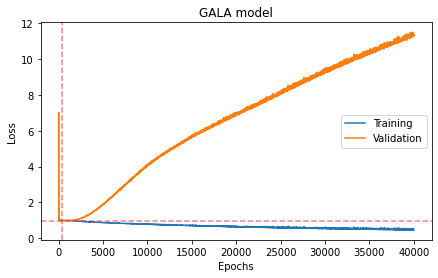

0.9838410019874573

In [ ]:
plot_results(epochs, torch.tensor(tr_losses), torch.tensor(te_losses),'GALA model')
np.min(te_losses)

#2.6 GCN variant (GASN)

Ppaer: https://www.sciencedirect.com/science/article/pii/S0031320321003964?via%3Dihub

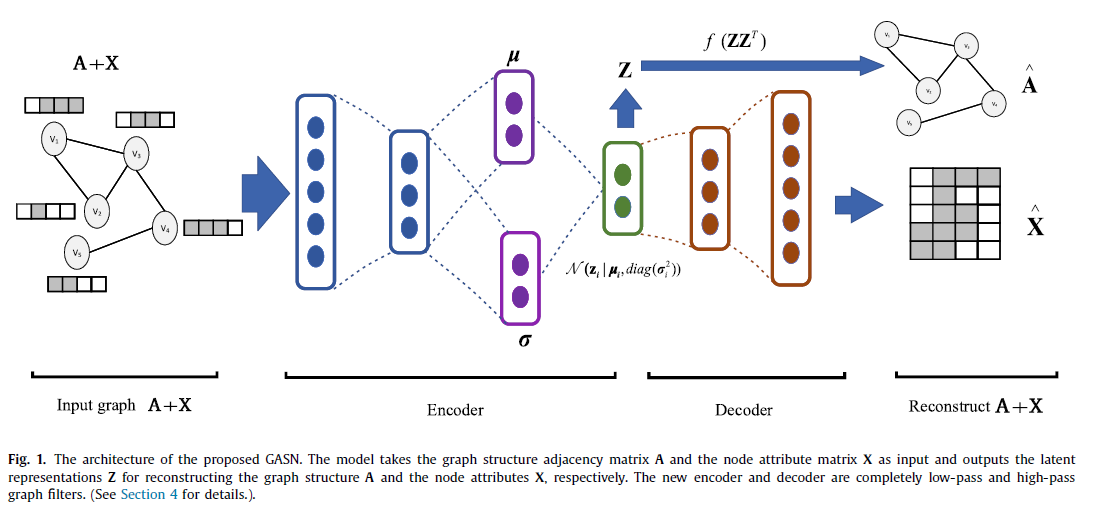

Encoder:

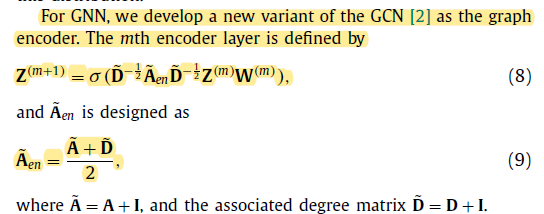

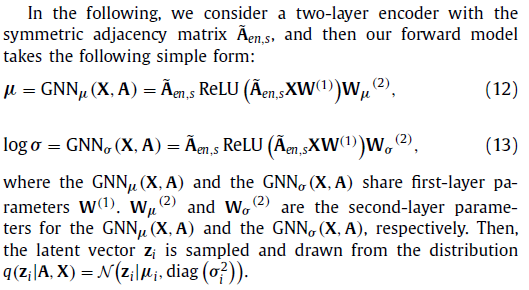

Decoder: (ignore the reconstruction for A)

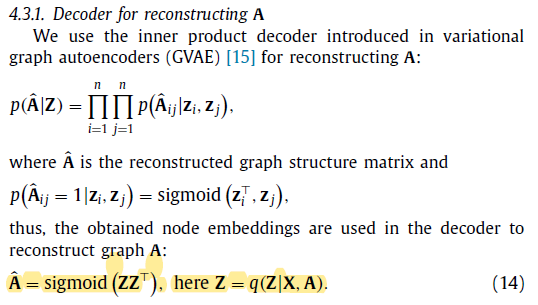

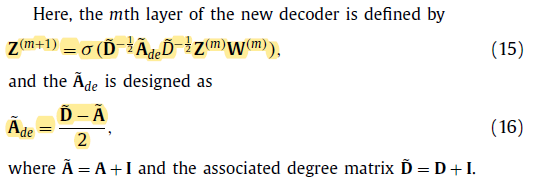

In [ ]:
# GCN layer for encoder
class GCNConv_enc(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super().__init__(aggr='add')  # "Add" aggregation (Step 5).
        self.lin = Linear(in_channels, out_channels, bias=False)
        self.bias = Parameter(torch.Tensor(out_channels))

        self.reset_parameters()

    def reset_parameters(self):
        # ------------------------------------------
        # initialize the network weight using normal distribution (he normal in Tensorflow)
        # ------------------------------------------
        self.lin.weight = nn.init.kaiming_normal_(self.lin.weight, mode='fan_out', nonlinearity='relu')
        self.bias.data.zero_()

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        # Step 1: Add self-loops to the adjacency matrix.
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        # Step 2: Linearly transform node feature matrix.
        x = self.lin(x)

        # ****************************
        # Step 3: Compute normalization. 
        row, col = edge_index
        deg = degree(col, x.size(0), dtype=x.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0

        # ----------------------------------------
        # GASN encoder normalization
        # ----------------------------------------
        # select = torch.tensor([True if i != j else False for (i,j) in zip(row, col)])
        select = torch.abs(row-col).bool()
        norm = 0.5 * deg_inv_sqrt[row] * deg_inv_sqrt[col] * select + 0.5 * deg_inv_sqrt[row] * deg_inv_sqrt[col] * (deg[row] +1) * ~select
        # ****************************
        
        # Step 4-5: Start propagating messages.
        out = self.propagate(edge_index, x=x, norm=norm)

        # Step 6: Apply a final bias vector.
        out += self.bias

        return out

    def message(self, x_j, norm):
        # x_j has shape [E, out_channels]

        # Step 4: Normalize node features.
        return norm.view(-1, 1) * x_j

# GCN layer for decoder
class GCNConv_dec(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super().__init__(aggr='add')  # "Add" aggregation (Step 5).
        self.lin = Linear(in_channels, out_channels, bias=False)
        self.bias = Parameter(torch.Tensor(out_channels))

        self.reset_parameters()

    def reset_parameters(self):
        # ------------------------------------------
        # initialize the network weight using normal distribution (he normal in Tensorflow)
        # ------------------------------------------
        self.lin.weight = nn.init.kaiming_normal_(self.lin.weight, mode='fan_out', nonlinearity='relu')
        self.bias.data.zero_()

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        # Step 1: Add self-loops to the adjacency matrix.
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        # Step 2: Linearly transform node feature matrix.
        x = self.lin(x)

        # ****************************
        # Step 3: Compute normalization. 
        row, col = edge_index
        deg = degree(col, x.size(0), dtype=x.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0

        # ----------------------------------------
        # GASN decoder normalization
        # ----------------------------------------
        select = torch.abs(row-col).bool()
        norm = 0.5 * deg_inv_sqrt[row] * deg_inv_sqrt[col] * select + 0.5 * deg_inv_sqrt[row] * deg_inv_sqrt[col] * (deg[row]-1) * ~select
        # ****************************
        
        # Step 4-5: Start propagating messages.
        out = self.propagate(edge_index, x=x, norm=norm)

        # Step 6: Apply a final bias vector.
        out += self.bias

        return out

    def message(self, x_j, norm):
        # x_j has shape [E, out_channels]

        # Step 4: Normalize node features.
        return norm.view(-1, 1) * x_j

# My GASN encoder
class My_GASN_enc(nn.Module):
    def __init__(self, in_channels, out_channels):
      super(My_GASN_enc,self).__init__()
      D = [200,100,50]
      self.GCN_enc1 = GCNConv_enc(in_channels,D[0])
      self.GCN_enc2 = GCNConv_enc(D[0],D[1])
      self.GCN_enc3 = GCNConv_enc(D[1],D[2])
      self.GCN_mu = GCNConv_enc(D[2],out_channels)
      self.GCN_logstd = GCNConv_enc(D[2],out_channels)
      self.kl = 0

    def forward(self, x, edge_index):
      # Encoder 
      x = self.GCN_enc1(x, edge_index).relu()
      x = self.GCN_enc2(x, edge_index).relu()
      x = self.GCN_enc3(x, edge_index).relu()
      mu = self.GCN_mu(x, edge_index)
      logstd = self.GCN_logstd(x,edge_index)
      z = mu + torch.exp(logstd)**2

      return mu,logstd

# My GASN decoder
class My_GASN_dec(nn.Module):
    def __init__(self, in_channels, out_channels, sigmoid = True):
      super(My_GASN_dec,self).__init__()
      D = [200,100,50]
      self.GCN_dec1 = GCNConv_dec(in_channels,D[0])
      self.GCN_dec2 = GCNConv_dec(D[0],D[1])
      self.GCN_dec3 = GCNConv_dec(D[1],D[2])
      self.GCN_dec4 = GCNConv_dec(D[2],out_channels)
    
    def reparametrize(self, mu: Tensor, logstd: Tensor):
      # if self.training:
      return mu + torch.randn_like(logstd) * torch.exp(logstd)
      # else:
      #     return mu

    def forward(self, edge_index, mu, logstd, sigmoid = True):

      # Decoder
      z = self.reparametrize(mu, logstd)
      hidden = self.GCN_dec1(z, edge_index).relu()
      hidden = self.GCN_dec2(hidden, edge_index).relu()
      hidden = self.GCN_dec3(hidden, edge_index).relu()
      out = self.GCN_dec4(hidden, edge_index)
      return out

class My_GASN(nn.Module):
    def __init__(self, encoder, decoder):
      super(My_GASN,self).__init__()

      self.encoder = encoder
      self.decoder = decoder
      self.kl = 0

    def recon_loss(self, x_hat, target):
      
      loss = torch.sqrt(torch.sum((x_hat-target)**2))
      return loss

    def forward(self,x,edge_index):
      mu,logstd = self.encoder(x, edge_index)
      x_hat = self.decoder(edge_index, mu, logstd)
      self.kl = -0.5 * torch.mean(torch.sum(1 + 2 * logstd - mu**2 - logstd.exp()**2, dim=1))
      return x_hat

In [ ]:
# ********************  Test
a = torch.tensor([[0,1,2,3],[1,2,3,4]])
print(a)
row,col = a
print(row,col)
x = torch.tensor([[1,2],[2,3],[3,4],[4,5],[5,6]])
deg = degree(col, x.size(0))
print(deg)
deg_inv_sqrt = deg.pow(-0.5)
deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0
print(deg_inv_sqrt)
# norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]
# print(norm)
# norm2= torch.tensor([True if i != j else False for (i,j) in zip(row,col)])
norm2 = torch.abs(row-col).bool()
print(norm2)
norm2 * deg_inv_sqrt[row] * deg_inv_sqrt[col] + ~norm2 * deg_inv_sqrt[row] * deg_inv_sqrt[col]/2

tensor([[0, 1, 2, 3],
        [1, 2, 3, 4]])
tensor([0, 1, 2, 3]) tensor([1, 2, 3, 4])
tensor([0., 1., 1., 1., 1.])
tensor([0., 1., 1., 1., 1.])
tensor([True, True, True, True])


tensor([0., 1., 1., 1.])

**Train GASN**

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 5000

# build up model
model = My_GASN(encoder = My_GASN_enc(in_channels, 32), decoder = My_GASN_dec(32, out_channels))
model = model.to(device)

# prepare the blocked data and real data
x2 = data2.x.to(device)
train_pos_edge_index = data2.edge_index.to(device)
x = data.x.to(device)

# set optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
def train(autoencoder, epochs=epochs):
    opt = optimizer
    for epoch in range(epochs):
      opt.zero_grad()
      # print(x2.device)
      # print(train_pos_edge_index.device)
      x_hat = autoencoder(x2, train_pos_edge_index)
      tr_loss = autoencoder.recon_loss(x_hat[train_idx,:],x[train_idx,:]) + autoencoder.kl
      te_loss = autoencoder.recon_loss(x_hat[test_idx,:],x[test_idx,:])
      tr_loss.backward()
      opt.step()
      print('Epoch: {:03d}, tr_loss: {:.4f}, te_loss: {:.4f}'.format(epoch,tr_loss,te_loss))
    return autoencoder

In [ ]:
epochs = 20000
optimizer = torch.optim.Adam(model.parameters(), lr=0.00002)

In [ ]:
GVAE_model = train(model, epochs=epochs)

In [ ]:
print(data.x)
print(GVAE_model(x,train_pos_edge_index))

tensor([[ 0.3903,  0.4151,  0.2198, -0.2736,  0.6561, -0.1460],
        [ 0.5457,  1.6653, -0.1722, -0.3441,  1.0417, -0.0605],
        [-1.3117, -1.3984, -0.4074,  0.0084, -1.0041,  1.2226],
        ...,
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       device='cuda:0')
tensor([[-0.5371, -0.2394, -0.1518, -0.0507, -0.0970,  0.4688],
        [-0.8145, -0.1596,  0.0231,  0.2365, -0.3221,  1.1948],
        [-1.5261, -0.9854, -0.1977,  0.0480, -0.5884,  1.3049],
        ...,
        [ 0.0731, -0.0020, -0.0285, -0.0103,  0.1296,  0.0601],
        [ 0.0318,  0.0320,  0.0584,  0.0138,  0.0878,  0.0750],
        [ 0.0318,  0.0320,  0.0584,  0.0138,  0.0878,  0.0750]],
       device='cuda:0', grad_fn=<AddBackward0>)



# **3. Reproducing Figure 4 from Ulyanov et al.**

3.1 original

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 20000

# build up model
model_real = My_GCN_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_real = model_real.to(device)

# prepare the input data and train data
x_input = data2.x.to(device) # normal noise
train_pos_edge_index = data.edge_index.to(device)
x_train = data3.x.to(device) # training data

# set optimizer
optimizer = torch.optim.Adam(model_real.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model_real.parameters(), lr=0.00005, momentum=0.3)

In [ ]:
# Set training function
def train_repro(autoencoder,x_input,x_train, epochs=epochs):
    opt = optimizer
    tr_losses = []

    # run epoch
    for epoch in range(epochs):

      # clean the gradient
      opt.zero_grad()

      # forward propagate      
      x_hat = autoencoder(x_input, train_pos_edge_index)

      # calculate the loss for train and validation      
      tr_loss = autoencoder.recon_loss(x_hat,x_train)

      # back propagate the training loss
      tr_loss.backward()

      # update networks parameters
      opt.step()

      # set gradient cliping
      torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.15, norm_type=2.0)

      # record training and validation loss
      tr_losses.append(tr_loss.tolist())

      if (epoch % 1000) == 0:
        print('Epoch: {:03d}, tr_loss: {:.4f}'.format(epoch,tr_loss))
    return autoencoder,tr_losses

In [ ]:
GCN_model_real,tr_losses_real = train_repro(model_real,x_input,x_train, epochs=epochs)

<ipython-input-14-00acc0b28cd9>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.15, norm_type=2.0)


Epoch: 000, tr_loss: 1.0019
Epoch: 1000, tr_loss: 0.6148
Epoch: 2000, tr_loss: 0.5287
Epoch: 3000, tr_loss: 0.4900
Epoch: 4000, tr_loss: 0.4653
Epoch: 5000, tr_loss: 0.4471
Epoch: 6000, tr_loss: 0.4322
Epoch: 7000, tr_loss: 0.4233
Epoch: 8000, tr_loss: 0.4101
Epoch: 9000, tr_loss: 0.4016
Epoch: 10000, tr_loss: 0.3942
Epoch: 11000, tr_loss: 0.3871
Epoch: 12000, tr_loss: 0.3807
Epoch: 13000, tr_loss: 0.3764
Epoch: 14000, tr_loss: 0.3727
Epoch: 15000, tr_loss: 0.3647
Epoch: 16000, tr_loss: 0.3627
Epoch: 17000, tr_loss: 0.3570
Epoch: 18000, tr_loss: 0.3571
Epoch: 19000, tr_loss: 0.3541


3.2 noisy input

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 20000

# build up model
model_noise= My_GCN_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_noise = model_noise.to(device)

# prepare the input data and train data
x_input = data2.x.to(device) # normal noise
train_pos_edge_index = data.edge_index.to(device)
x_train = copy.deepcopy(data3.x).to(device) # real data

# add noise
w = torch.empty(x_train.shape)
x_noi = (x_train + torch.normal(0, 0.2, size=data.x.shape, generator=torch.Generator().manual_seed(1234)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_noise.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)

In [ ]:
GCN_model_noise,tr_losses_noise = train_repro(model_noise,x_input,x_noi, epochs=epochs)

<ipython-input-14-00acc0b28cd9>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.15, norm_type=2.0)


Epoch: 000, tr_loss: 1.0376
Epoch: 1000, tr_loss: 0.6514
Epoch: 2000, tr_loss: 0.5669
Epoch: 3000, tr_loss: 0.5255
Epoch: 4000, tr_loss: 0.4998
Epoch: 5000, tr_loss: 0.4829
Epoch: 6000, tr_loss: 0.4671
Epoch: 7000, tr_loss: 0.4555
Epoch: 8000, tr_loss: 0.4458
Epoch: 9000, tr_loss: 0.4363
Epoch: 10000, tr_loss: 0.4288
Epoch: 11000, tr_loss: 0.4259
Epoch: 12000, tr_loss: 0.4160
Epoch: 13000, tr_loss: 0.4117
Epoch: 14000, tr_loss: 0.4058
Epoch: 15000, tr_loss: 0.4006
Epoch: 16000, tr_loss: 0.3987
Epoch: 17000, tr_loss: 0.3920
Epoch: 18000, tr_loss: 0.3924
Epoch: 19000, tr_loss: 0.3846


3.3 shuffled

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 20000

# build up model
model_shuffle = My_GCN_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_shuffle = model_shuffle.to(device)

# prepare the data
x_input = data2.x.to(device)
train_pos_edge_index = data.edge_index.to(device)
x_train = copy.deepcopy(data3.x).to(device) # real data

# random shuffle
x_shuffle = x_train.index_select(0, torch.randperm(x_train.shape[0]).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_shuffle.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)

In [ ]:
GCN_model_shuffle,tr_losses_shuffle = train_repro(model_shuffle, x_input, x_shuffle, epochs=epochs)

<ipython-input-14-00acc0b28cd9>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.15, norm_type=2.0)


Epoch: 000, tr_loss: 1.0021
Epoch: 1000, tr_loss: 0.8537
Epoch: 2000, tr_loss: 0.8031
Epoch: 3000, tr_loss: 0.7724
Epoch: 4000, tr_loss: 0.7493
Epoch: 5000, tr_loss: 0.7314
Epoch: 6000, tr_loss: 0.7163
Epoch: 7000, tr_loss: 0.7037
Epoch: 8000, tr_loss: 0.6932
Epoch: 9000, tr_loss: 0.6830
Epoch: 10000, tr_loss: 0.6735
Epoch: 11000, tr_loss: 0.6650
Epoch: 12000, tr_loss: 0.6581
Epoch: 13000, tr_loss: 0.6537
Epoch: 14000, tr_loss: 0.6448
Epoch: 15000, tr_loss: 0.6380
Epoch: 16000, tr_loss: 0.6349
Epoch: 17000, tr_loss: 0.6273
Epoch: 18000, tr_loss: 0.6234
Epoch: 19000, tr_loss: 0.6177


3.4 noise

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 20000

# build up model
model_pure_noise = My_GCN_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_pure_noise = model_pure_noise.to(device)

# prepare the blocked data and real data
x_input = data2.x.to(device)
train_pos_edge_index = data.edge_index.to(device)
x_train = copy.deepcopy(data3.x).to(device) # real data

# random noise
x_p_noi = ( torch.normal(0, 1, size=x_input.shape, generator=torch.Generator().manual_seed(12345678)).to(device)).to(device)
# x_p_noi = (torch.rand(data.x.shape, generator=torch.Generator().manual_seed(123456)).to(device)).to(device)

print(x_p_noi)
# set optimizer
optimizer = torch.optim.Adam(model_pure_noise.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)

tensor([[-0.1368, -0.4975,  1.5199, -0.0651, -0.7314, -0.3471],
        [ 0.0087,  0.2386,  2.2772,  2.6056,  0.0693, -0.2670],
        [ 1.8078,  0.5847,  0.0436,  0.4648, -1.9686,  0.4919],
        ...,
        [ 0.1334, -0.8726, -0.9991,  0.0616, -0.5192,  1.0328],
        [ 2.1668,  0.0172,  0.2801,  0.2149,  0.0842, -0.0706],
        [-0.6972, -0.1676,  1.4662,  0.1890,  1.1217,  1.0152]],
       device='cuda:0')


In [ ]:
GCN_model_p_noise,tr_losses_p_noise = train_repro(model_pure_noise,x_input,x_p_noi, epochs=epochs)

Epoch: 000, tr_loss: 0.9968


<ipython-input-14-00acc0b28cd9>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.15, norm_type=2.0)


Epoch: 1000, tr_loss: 0.8411
Epoch: 2000, tr_loss: 0.7813
Epoch: 3000, tr_loss: 0.7447
Epoch: 4000, tr_loss: 0.7188
Epoch: 5000, tr_loss: 0.6987
Epoch: 6000, tr_loss: 0.6821
Epoch: 7000, tr_loss: 0.6681
Epoch: 8000, tr_loss: 0.6562
Epoch: 9000, tr_loss: 0.6449
Epoch: 10000, tr_loss: 0.6355
Epoch: 11000, tr_loss: 0.6270
Epoch: 12000, tr_loss: 0.6190
Epoch: 13000, tr_loss: 0.6115
Epoch: 14000, tr_loss: 0.6050
Epoch: 15000, tr_loss: 0.5982
Epoch: 16000, tr_loss: 0.5923
Epoch: 17000, tr_loss: 0.5865
Epoch: 18000, tr_loss: 0.5815
Epoch: 19000, tr_loss: 0.5770


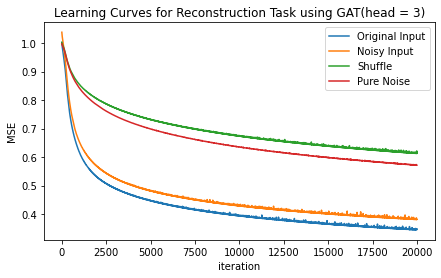

In [ ]:
# Plot
fig_rec = plt.figure(figsize=(7,4))
plt.xlabel('iteration')
plt.ylabel('MSE')
axes = plt.gca()
# axes.set_ylim([3.5,6])
plt.plot((torch.tensor(tr_losses_real)))
plt.plot((torch.tensor(tr_losses_noise)))
plt.plot((torch.tensor(tr_losses_shuffle)))
plt.plot((torch.tensor(tr_losses_p_noise)))
plt.legend(['Original Input','Noisy Input','Shuffle','Pure Noise'])
plt.title('Learning Curves for Reconstruction Task using GAT(head = 3)')
plt.show()

fig_rec.savefig('reconstruction_GAT.png')

**For test**

# **3.2**

GCN

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 8000

# build up model
model_pure_noise_2 = My_GCN_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_pure_noise_2 = model_pure_noise_2.to(device)

# prepare the blocked data and real data
x_input = data2.x.to(device)
train_pos_edge_index = data.edge_index.to(device)
x_train = copy.deepcopy(data3.x).to(device) # real data

# random noise
x_p_noi = ( torch.normal(0, 1, size=x_input.shape, generator=torch.Generator().manual_seed(12345678)).to(device)).to(device)
# x_p_noi = (torch.rand(data.x.shape, generator=torch.Generator().manual_seed(123456)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_pure_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_p_noise_2_1 = train_repro(model_pure_noise_2,x_input,x_p_noi, epochs=epochs)

#################### Another noise
model_pure_noise_2 = My_GCN_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_pure_noise_2 = model_pure_noise_2.to(device)

# random noise
x_p_noi = ( torch.normal(0, 1.25, size=x_input.shape, generator=torch.Generator().manual_seed(12345678)).to(device)).to(device)
# x_p_noi = (torch.rand(data.x.shape, generator=torch.Generator().manual_seed(123456)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_pure_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_p_noise_2_2 = train_repro(model_pure_noise_2,x_input,x_p_noi, epochs=epochs)

#################### Another noise
model_pure_noise_2 = My_GCN_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_pure_noise_2 = model_pure_noise_2.to(device)

# random noise
x_p_noi = ( torch.normal(0, 1.5, size=x_input.shape, generator=torch.Generator().manual_seed(12345678)).to(device)).to(device)
# x_p_noi = (torch.rand(data.x.shape, generator=torch.Generator().manual_seed(123456)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_pure_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_p_noise_2_3 = train_repro(model_pure_noise_2,x_input,x_p_noi, epochs=epochs)


<ipython-input-51-00acc0b28cd9>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.15, norm_type=2.0)


Epoch: 000, tr_loss: 0.9971
Epoch: 1000, tr_loss: 0.8410
Epoch: 2000, tr_loss: 0.7825
Epoch: 3000, tr_loss: 0.7473
Epoch: 4000, tr_loss: 0.7217
Epoch: 5000, tr_loss: 0.7013
Epoch: 6000, tr_loss: 0.6838
Epoch: 7000, tr_loss: 0.6688
Epoch: 000, tr_loss: 1.5577
Epoch: 1000, tr_loss: 1.3252
Epoch: 2000, tr_loss: 1.2365
Epoch: 3000, tr_loss: 1.1831
Epoch: 4000, tr_loss: 1.1434
Epoch: 5000, tr_loss: 1.1113
Epoch: 6000, tr_loss: 1.0849
Epoch: 7000, tr_loss: 1.0622
Epoch: 000, tr_loss: 2.2425
Epoch: 1000, tr_loss: 1.9233
Epoch: 2000, tr_loss: 1.7940
Epoch: 3000, tr_loss: 1.7167
Epoch: 4000, tr_loss: 1.6605
Epoch: 5000, tr_loss: 1.6150
Epoch: 6000, tr_loss: 1.5774
Epoch: 7000, tr_loss: 1.5456


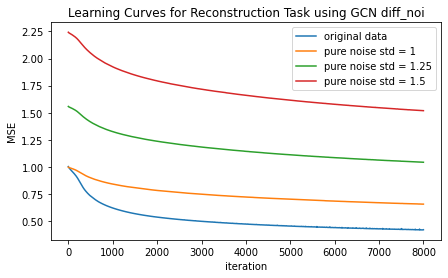

In [ ]:
# Plot
fig_rec = plt.figure(figsize=(7,4))
plt.xlabel('iteration')
plt.ylabel('MSE')
axes = plt.gca()
# axes.set_ylim([3.5,6])
plt.plot((torch.tensor(tr_losses_real)))
plt.plot((torch.tensor(tr_losses_p_noise_2_1)))
plt.plot((torch.tensor(tr_losses_p_noise_2_2)))
plt.plot((torch.tensor(tr_losses_p_noise_2_3)))
plt.legend(['original data','pure noise std = 1','pure noise std = 1.25','pure noise std = 1.5'])
plt.title('Learning Curves for Reconstruction Task using GCN diff_noi')
plt.show()

fig_rec.savefig('reconstruction_GCN_diff_noi.png')

GAT

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 8000

# build up model
model_pure_noise_2 = My_GAT_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256],head_num = 3)
model_pure_noise_2 = model_pure_noise_2.to(device)

# prepare the blocked data and real data
x_input = data2.x.to(device)
train_pos_edge_index = data.edge_index.to(device)
x_train = copy.deepcopy(data3.x).to(device) # real data

# random noise
x_p_noi = ( torch.normal(0, 1, size=x_input.shape, generator=torch.Generator().manual_seed(12345678)).to(device)).to(device)
# x_p_noi = (torch.rand(data.x.shape, generator=torch.Generator().manual_seed(123456)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_pure_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_p_noise_2_1 = train_repro(model_pure_noise_2,x_input,x_p_noi, epochs=epochs)

#################### Another noise
model_pure_noise_2 = My_GAT_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256],head_num = 3)
model_pure_noise_2 = model_pure_noise_2.to(device)

# random noise
x_p_noi = ( torch.normal(0, 1.25, size=x_input.shape, generator=torch.Generator().manual_seed(12345678)).to(device)).to(device)
# x_p_noi = (torch.rand(data.x.shape, generator=torch.Generator().manual_seed(123456)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_pure_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_p_noise_2_2 = train_repro(model_pure_noise_2,x_input,x_p_noi, epochs=epochs)

#################### Another noise
model_pure_noise_2 = My_GAT_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256],head_num = 3)
model_pure_noise_2 = model_pure_noise_2.to(device)

# random noise
x_p_noi = ( torch.normal(0, 1.5, size=x_input.shape, generator=torch.Generator().manual_seed(12345678)).to(device)).to(device)
# x_p_noi = (torch.rand(data.x.shape, generator=torch.Generator().manual_seed(123456)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_pure_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_p_noise_2_3 = train_repro(model_pure_noise_2,x_input,x_p_noi, epochs=epochs)


<ipython-input-51-00acc0b28cd9>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.15, norm_type=2.0)


Epoch: 000, tr_loss: 0.9968
Epoch: 1000, tr_loss: 0.6819
Epoch: 2000, tr_loss: 0.5606
Epoch: 3000, tr_loss: 0.4989
Epoch: 4000, tr_loss: 0.4616
Epoch: 5000, tr_loss: 0.4424
Epoch: 6000, tr_loss: 0.4129
Epoch: 7000, tr_loss: 0.3961
Epoch: 000, tr_loss: 1.5575
Epoch: 1000, tr_loss: 1.0874
Epoch: 2000, tr_loss: 0.9036
Epoch: 3000, tr_loss: 0.8104
Epoch: 4000, tr_loss: 0.7514
Epoch: 5000, tr_loss: 0.7119
Epoch: 6000, tr_loss: 0.6814
Epoch: 7000, tr_loss: 0.6590
Epoch: 000, tr_loss: 2.2428
Epoch: 1000, tr_loss: 1.5702
Epoch: 2000, tr_loss: 1.3099
Epoch: 3000, tr_loss: 1.1749
Epoch: 4000, tr_loss: 1.0927
Epoch: 5000, tr_loss: 1.0404
Epoch: 6000, tr_loss: 0.9904
Epoch: 7000, tr_loss: 0.9549


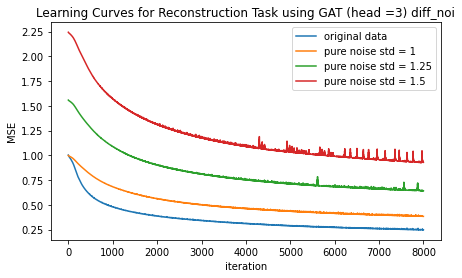

In [ ]:
# Plot
fig_rec = plt.figure(figsize=(7,4))
plt.xlabel('iteration')
plt.ylabel('MSE')
axes = plt.gca()
# axes.set_ylim([3.5,6])
plt.plot((torch.tensor(tr_losses_real)))
plt.plot((torch.tensor(tr_losses_p_noise_2_1)))
plt.plot((torch.tensor(tr_losses_p_noise_2_2)))
plt.plot((torch.tensor(tr_losses_p_noise_2_3)))
plt.legend(['original data','pure noise std = 1','pure noise std = 1.25','pure noise std = 1.5'])
plt.title('Learning Curves for Reconstruction Task using GAT (head =3) diff_noi')
plt.show()

fig_rec.savefig('reconstruction_GAT_diff_noi.png')

GraphSAGE

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 8000

# build up model
model_pure_noise_2 = My_GSage_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_pure_noise_2 = model_pure_noise_2.to(device)

# prepare the blocked data and real data
x_input = data2.x.to(device)
train_pos_edge_index = data.edge_index.to(device)
x_train = copy.deepcopy(data3.x).to(device) # real data

# random noise
x_p_noi = ( torch.normal(0, 1, size=x_input.shape, generator=torch.Generator().manual_seed(12345678)).to(device)).to(device)
# x_p_noi = (torch.rand(data.x.shape, generator=torch.Generator().manual_seed(123456)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_pure_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_p_noise_2_1 = train_repro(model_pure_noise_2,x_input,x_p_noi, epochs=epochs)

#################### Another noise
model_pure_noise_2 = My_GSage_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_pure_noise_2 = model_pure_noise_2.to(device)

# random noise
x_p_noi = ( torch.normal(0, 1.25, size=x_input.shape, generator=torch.Generator().manual_seed(12345678)).to(device)).to(device)
# x_p_noi = (torch.rand(data.x.shape, generator=torch.Generator().manual_seed(123456)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_pure_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_p_noise_2_2 = train_repro(model_pure_noise_2,x_input,x_p_noi, epochs=epochs)

#################### Another noise
model_pure_noise_2 = My_GSage_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_pure_noise_2 = model_pure_noise_2.to(device)

# random noise
x_p_noi = ( torch.normal(0, 1.5, size=x_input.shape, generator=torch.Generator().manual_seed(12345678)).to(device)).to(device)
# x_p_noi = (torch.rand(data.x.shape, generator=torch.Generator().manual_seed(123456)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_pure_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_p_noise_2_3 = train_repro(model_pure_noise_2,x_input,x_p_noi, epochs=epochs)


<ipython-input-18-00acc0b28cd9>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.15, norm_type=2.0)


Epoch: 000, tr_loss: 1.0042
Epoch: 1000, tr_loss: 0.5432
Epoch: 2000, tr_loss: 0.3045
Epoch: 3000, tr_loss: 0.1931
Epoch: 4000, tr_loss: 0.1355
Epoch: 5000, tr_loss: 0.0989
Epoch: 6000, tr_loss: 0.0760
Epoch: 7000, tr_loss: 0.0616
Epoch: 000, tr_loss: 1.5630
Epoch: 1000, tr_loss: 0.8515
Epoch: 2000, tr_loss: 0.4719
Epoch: 3000, tr_loss: 0.2978
Epoch: 4000, tr_loss: 0.2056
Epoch: 5000, tr_loss: 0.1519
Epoch: 6000, tr_loss: 0.1160
Epoch: 7000, tr_loss: 0.0919
Epoch: 000, tr_loss: 2.2517
Epoch: 1000, tr_loss: 1.2185
Epoch: 2000, tr_loss: 0.6644
Epoch: 3000, tr_loss: 0.4113
Epoch: 4000, tr_loss: 0.2797
Epoch: 5000, tr_loss: 0.2029
Epoch: 6000, tr_loss: 0.1554
Epoch: 7000, tr_loss: 0.1215


[1.0041645765304565, 0.9969550967216492, 0.9988219141960144, 0.9994356036186218, 0.9977660775184631, 0.9960273504257202, 0.9953308701515198, 0.9955719709396362, 0.9959154725074768, 0.9957342147827148, 0.9950886368751526, 0.9943352937698364, 0.9938260316848755, 0.9936788082122803, 0.9937371611595154, 0.9937068819999695, 0.9934428334236145, 0.993016242980957, 0.9926085472106934, 0.9923654198646545, 0.992277979850769, 0.992190957069397, 0.9920034408569336, 0.9916977286338806, 0.9913749098777771, 0.9911417961120605, 0.9910025596618652, 0.9908760190010071, 0.9906938076019287, 0.9904524087905884, 0.9902095794677734, 0.9900122880935669, 0.9898675680160522, 0.9897128939628601, 0.9895206689834595, 0.989313542842865, 0.98912513256073, 0.9889625906944275, 0.988810122013092, 0.98863685131073, 0.988446831703186, 0.9882692694664001, 0.9881110191345215, 0.9879478812217712, 0.987770140171051, 0.9875870943069458, 0.9874098896980286, 0.9872360229492188, 0.9870635867118835, 0.9868889451026917, 0.98671120

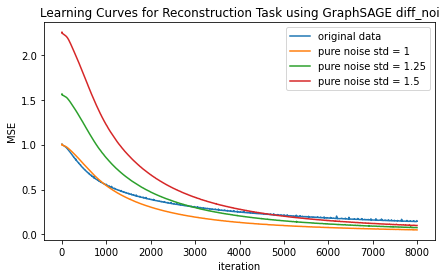

In [ ]:
# np.arange(1,2,0.2)
# tr_loss = np.empty((20,5))
# j = 0
# for i in torch.tensor(np.arange(1,2,0.2)):
#   print(diff_noi(i))
#   print(nn)
#   tr_loss[:,j] = nn
#   j = j+1
# tr_loss
print(tr_losses_p_noise_2_1)
print(tr_losses_p_noise_2_2)
print(tr_losses_p_noise_2_3)

# Plot
fig_rec = plt.figure(figsize=(7,4))
plt.xlabel('iteration')
plt.ylabel('MSE')
axes = plt.gca()
# axes.set_ylim([3.5,6])
plt.plot((torch.tensor(tr_losses_real)))
plt.plot((torch.tensor(tr_losses_p_noise_2_1)))
plt.plot((torch.tensor(tr_losses_p_noise_2_2)))
plt.plot((torch.tensor(tr_losses_p_noise_2_3)))
plt.legend(['original data','pure noise std = 1','pure noise std = 1.25','pure noise std = 1.5'])
plt.title('Learning Curves for Reconstruction Task using GraphSAGE diff_noi')
plt.show()

fig_rec.savefig('reconstruction_GraphSAGE_diff_noi.png')

# **3.3**

GCN

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 8000

# build up model
model_noise= My_GCN_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_noise = model_noise.to(device)

# prepare the input data and train data
x_input = data2.x.to(device) # normal noise
train_pos_edge_index = data.edge_index.to(device)
x_train = copy.deepcopy(data3.x).to(device) # real data

# add noise
x_noi = (x_train + torch.normal(0, 0.2, size=data.x.shape, generator=torch.Generator().manual_seed(1234)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_noise.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_noise_2_1 = train_repro(model_noise,x_input,x_noi, epochs=epochs)

#################### Another noise
model_noise_2 = My_GCN_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_noise_2 = model_noise_2.to(device)

# add noise
x_train = copy.deepcopy(data3.x).to(device) # real data
x_noi = (x_train + torch.normal(0, 0.4, size=data.x.shape, generator=torch.Generator().manual_seed(1234)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_noise_2_2 = train_repro(model_noise_2,x_input,x_noi, epochs=epochs)

#################### Another noise
model_noise_2 = My_GCN_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_noise_2 = model_noise_2.to(device)

# add noise
x_train = copy.deepcopy(data3.x).to(device) # real data
x_noi = (x_train + torch.normal(0, 0.6, size=data.x.shape, generator=torch.Generator().manual_seed(1234)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_noise_2_3 = train_repro(model_noise_2,x_input,x_noi, epochs=epochs)


<ipython-input-51-00acc0b28cd9>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.15, norm_type=2.0)


Epoch: 000, tr_loss: 1.0373
Epoch: 1000, tr_loss: 0.6546
Epoch: 2000, tr_loss: 0.5689
Epoch: 3000, tr_loss: 0.5274
Epoch: 4000, tr_loss: 0.5038
Epoch: 5000, tr_loss: 0.4836
Epoch: 6000, tr_loss: 0.4694
Epoch: 7000, tr_loss: 0.4566
Epoch: 000, tr_loss: 1.1532
Epoch: 1000, tr_loss: 0.7600
Epoch: 2000, tr_loss: 0.6661
Epoch: 3000, tr_loss: 0.6228
Epoch: 4000, tr_loss: 0.5939
Epoch: 5000, tr_loss: 0.5733
Epoch: 6000, tr_loss: 0.5568
Epoch: 7000, tr_loss: 0.5433
Epoch: 000, tr_loss: 1.3512
Epoch: 1000, tr_loss: 0.9306
Epoch: 2000, tr_loss: 0.8310
Epoch: 3000, tr_loss: 0.7807
Epoch: 4000, tr_loss: 0.7492
Epoch: 5000, tr_loss: 0.7261
Epoch: 6000, tr_loss: 0.7068
Epoch: 7000, tr_loss: 0.6954


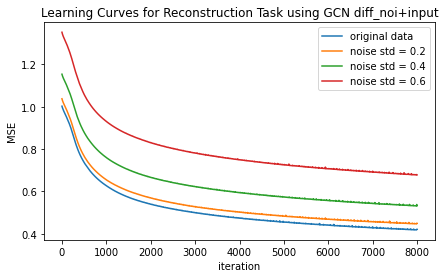

In [ ]:
# Plot
fig_rec = plt.figure(figsize=(7,4))
plt.xlabel('iteration')
plt.ylabel('MSE')
axes = plt.gca()
# axes.set_ylim([3.5,6])
plt.plot((torch.tensor(tr_losses_real)))
plt.plot((torch.tensor(tr_losses_noise_2_1)))
plt.plot((torch.tensor(tr_losses_noise_2_2)))
plt.plot((torch.tensor(tr_losses_noise_2_3)))
plt.legend(['original data','noise std = 0.2','noise std = 0.4','noise std = 0.6'])
plt.title('Learning Curves for Reconstruction Task using GCN diff_noi+input')
plt.show()

fig_rec.savefig('reconstruction_GCN_diff_noi+input.png')

GAT

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 8000

# build up model
model_noise= My_GAT_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256],head_num = 3)
model_noise = model_noise.to(device)

# prepare the input data and train data
x_input = data2.x.to(device) # normal noise
train_pos_edge_index = data.edge_index.to(device)
x_train = copy.deepcopy(data3.x).to(device) # real data

# add noise
x_noi = (x_train + torch.normal(0, 0.2, size=data.x.shape, generator=torch.Generator().manual_seed(1234)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_noise.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_noise_2_1 = train_repro(model_noise,x_input,x_noi, epochs=epochs)

#################### Another noise
model_noise_2 = My_GAT_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256],head_num = 3)
model_noise_2 = model_noise_2.to(device)

# add noise
x_train = copy.deepcopy(data3.x).to(device) # real data
x_noi = (x_train + torch.normal(0, 0.4, size=data.x.shape, generator=torch.Generator().manual_seed(1234)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_noise_2_2 = train_repro(model_noise_2,x_input,x_noi, epochs=epochs)

#################### Another noise
model_noise_2 = My_GAT_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256],head_num = 3)
model_noise_2 = model_noise_2.to(device)

# add noise
x_train = copy.deepcopy(data3.x).to(device) # real data
x_noi = (x_train + torch.normal(0, 0.6, size=data.x.shape, generator=torch.Generator().manual_seed(1234)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_noise_2_3 = train_repro(model_noise_2,x_input,x_noi, epochs=epochs)


<ipython-input-51-00acc0b28cd9>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.15, norm_type=2.0)


Epoch: 000, tr_loss: 1.0373
Epoch: 1000, tr_loss: 0.4815
Epoch: 2000, tr_loss: 0.3858
Epoch: 3000, tr_loss: 0.3378
Epoch: 4000, tr_loss: 0.3083
Epoch: 5000, tr_loss: 0.2887
Epoch: 6000, tr_loss: 0.2736
Epoch: 7000, tr_loss: 0.2622
Epoch: 000, tr_loss: 1.1538
Epoch: 1000, tr_loss: 0.5779
Epoch: 2000, tr_loss: 0.4743
Epoch: 3000, tr_loss: 0.4201
Epoch: 4000, tr_loss: 0.3849
Epoch: 5000, tr_loss: 0.3609
Epoch: 6000, tr_loss: 0.3427
Epoch: 7000, tr_loss: 0.3283
Epoch: 000, tr_loss: 1.3512
Epoch: 1000, tr_loss: 0.7319
Epoch: 2000, tr_loss: 0.6076
Epoch: 3000, tr_loss: 0.5462
Epoch: 4000, tr_loss: 0.5108
Epoch: 5000, tr_loss: 0.4824
Epoch: 6000, tr_loss: 0.4602
Epoch: 7000, tr_loss: 0.4464


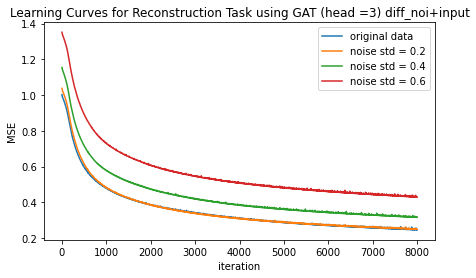

In [ ]:
# Plot
fig_rec = plt.figure(figsize=(7,4))
plt.xlabel('iteration')
plt.ylabel('MSE')
axes = plt.gca()
# axes.set_ylim([3.5,6])
plt.plot((torch.tensor(tr_losses_real)))
plt.plot((torch.tensor(tr_losses_noise_2_1)))
plt.plot((torch.tensor(tr_losses_noise_2_2)))
plt.plot((torch.tensor(tr_losses_noise_2_3)))
plt.legend(['original data','noise std = 0.2','noise std = 0.4','noise std = 0.6'])
plt.title('Learning Curves for Reconstruction Task using GAT (head =3) diff_noi+input')
plt.show()

fig_rec.savefig('reconstruction_GAT_diff_noi+input.png')

GraphSage

In [ ]:
# set input and output channels
in_channels = data2.x.shape[1]
out_channels = data2.x.shape[1]

# set epochs
epochs = 8000

# build up model
model_noise= My_GSage_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_noise = model_noise.to(device)

# prepare the input data and train data
x_input = data2.x.to(device) # normal noise
train_pos_edge_index = data.edge_index.to(device)
x_train = copy.deepcopy(data3.x).to(device) # real data

# add noise
x_noi = (x_train + torch.normal(0, 0.2, size=data.x.shape, generator=torch.Generator().manual_seed(1234)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_noise.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_noise_2_1 = train_repro(model_noise,x_input,x_noi, epochs=epochs)

#################### Another noise
model_noise_2 = My_GSage_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_noise_2 = model_noise_2.to(device)

# add noise
x_train = copy.deepcopy(data3.x).to(device) # real data
x_noi = (x_train + torch.normal(0, 0.4, size=data.x.shape, generator=torch.Generator().manual_seed(1234)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_noise_2_2 = train_repro(model_noise_2,x_input,x_noi, epochs=epochs)

#################### Another noise
model_noise_2 = My_GSage_model(input_dim = in_channels, output_dim = out_channels,hidden_dim = [512,256])
model_noise_2 = model_noise_2.to(device)

# add noise
x_train = copy.deepcopy(data3.x).to(device) # real data
x_noi = (x_train + torch.normal(0, 0.6, size=data.x.shape, generator=torch.Generator().manual_seed(1234)).to(device)).to(device)

# set optimizer
optimizer = torch.optim.Adam(model_noise_2.parameters(), lr=0.0003)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.00005, momentum=0.3)
_,tr_losses_noise_2_3 = train_repro(model_noise_2,x_input,x_noi, epochs=epochs)


<ipython-input-51-00acc0b28cd9>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=0.15, norm_type=2.0)


Epoch: 000, tr_loss: 1.0422
Epoch: 1000, tr_loss: 0.5798
Epoch: 2000, tr_loss: 0.4178
Epoch: 3000, tr_loss: 0.3279
Epoch: 4000, tr_loss: 0.2726
Epoch: 5000, tr_loss: 0.2294
Epoch: 6000, tr_loss: 0.2020
Epoch: 7000, tr_loss: 0.1742
Epoch: 000, tr_loss: 1.1598
Epoch: 1000, tr_loss: 0.6821
Epoch: 2000, tr_loss: 0.4872
Epoch: 3000, tr_loss: 0.3853
Epoch: 4000, tr_loss: 0.3135
Epoch: 5000, tr_loss: 0.2662
Epoch: 6000, tr_loss: 0.2275
Epoch: 7000, tr_loss: 0.1965
Epoch: 000, tr_loss: 1.3558
Epoch: 1000, tr_loss: 0.8117
Epoch: 2000, tr_loss: 0.5788
Epoch: 3000, tr_loss: 0.4556
Epoch: 4000, tr_loss: 0.3637
Epoch: 5000, tr_loss: 0.3032
Epoch: 6000, tr_loss: 0.2573
Epoch: 7000, tr_loss: 0.2193


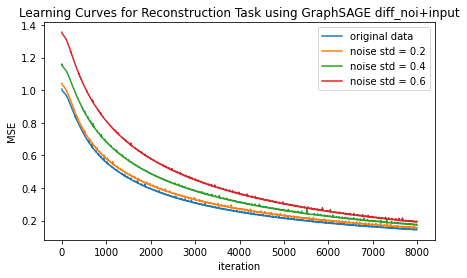

In [ ]:
# Plot
fig_rec = plt.figure(figsize=(7,4))
plt.xlabel('iteration')
plt.ylabel('MSE')
axes = plt.gca()
# axes.set_ylim([3.5,6])
plt.plot((torch.tensor(tr_losses_real)))
plt.plot((torch.tensor(tr_losses_noise_2_1)))
plt.plot((torch.tensor(tr_losses_noise_2_2)))
plt.plot((torch.tensor(tr_losses_noise_2_3)))
plt.legend(['original data','noise std = 0.2','noise std = 0.4','noise std = 0.6'])
plt.title('Learning Curves for Reconstruction Task using GraphSAGE diff_noi+input')
plt.show()

fig_rec.savefig('reconstruction_GraphSAGE_diff_noi+input.png')

# **4. Denoising**

In [ ]:
# set input and output channels
in_channels = data4.x.shape[1]
out_channels = data4.x.shape[1]

# set epochs
epochs = 30000

# build up model
model_GALA_de = My_GALA(encoder = My_GALA_enc(in_channels, 32), decoder = My_GALA_dec(32, out_channels))
model_GALA_de = model_GALA_de.to(device)

# prepare the blocked data and real data
x4 = data4.x.to(device)
train_pos_edge_index = data3.edge_index.to(device)
x3 = data3.x.to(device)

# set optimizer
optimizer = torch.optim.Adam(model_GALA_de.parameters(), lr=0.0025)
# optimizer = torch.optim.SGD(model_GALA_de.parameters(), lr=0.00005, momentum=0.3)

# Set training function
def train_de(autoencoder, epochs=epochs):
    opt = optimizer
    tr_losses = []
    te_losses = []
    tr_loss= 100000

    # run epoch
    for epoch in range(epochs):
      
      # update learning rate during training (optional)
      if (tr_loss > 80) and (tr_loss < 81) :
        opt.param_groups[0]['lr'] = 0.001    # 0.001
      if (tr_loss > 65) and (tr_loss < 66):
        opt.param_groups[0]['lr'] = 0.0005     # 0.0006
      if (tr_loss > 58) and (tr_loss < 59):
        opt.param_groups[0]['lr'] = 0.000125    # 0.0003

      # clean the gradient
      opt.zero_grad()

      # forward propagate
      x_hat = autoencoder(x4, train_pos_edge_index)

      # calculate the loss for train and validation
      tr_loss = autoencoder.recon_loss(x_hat,x4)
      te_loss = autoencoder.recon_loss(x_hat,x3)

      # back propagate the training loss
      tr_loss.backward()

      # update networks parameters
      opt.step()

      # set gradient cliping
      torch.nn.utils.clip_grad_norm(parameters=autoencoder.parameters(), max_norm=10, norm_type=2.0)

      # record training and validation loss
      tr_losses.append(tr_loss.tolist())
      te_losses.append(te_loss.tolist())

      print('Epoch: {:03d}, tr_loss: {:.4f}, te_loss: {:.4f}'.format(epoch,tr_loss,te_loss))
    return autoencoder,tr_losses,te_losses

In [ ]:
GALA_de_model,tr_losses_de,te_losses_de = train_de(model_GALA_de, epochs=epochs)

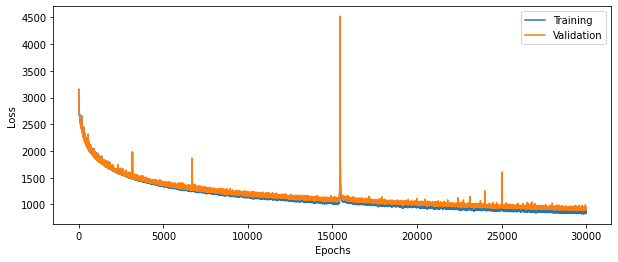

In [ ]:
plot_results(epochs, tr_losses_de, te_losses_de)

# **EXAMPLE OF VAE (template for VAE)**

In [ ]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class Encoder(nn.Module):
    def __init__(self, latent_dims):
        super(Encoder, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.linear2 = nn.Linear(512, latent_dims)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        return self.linear2(x)

In [ ]:
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 512)
        self.linear2 = nn.Linear(512, 784)

    def forward(self, z):
        z = F.relu(self.linear1(z))
        z = torch.sigmoid(self.linear2(z))
        return z.reshape((-1, 1, 28, 28))

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [ ]:
def train(autoencoder, data, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        for x, y in data:
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).sum()
            loss.backward()
            opt.step()
    return autoencoder

In [ ]:
latent_dims = 2
autoencoder = Autoencoder(latent_dims).to(device) # GPU

data = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./data',
               transform=torchvision.transforms.ToTensor(),
               download=True),
        batch_size=128,
        shuffle=True)

autoencoder = train(autoencoder, data)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
def plot_latent(autoencoder, data, num_batches=100):
    for i, (x, y) in enumerate(data):
        z = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        if i > num_batches:
            plt.colorbar()
            break

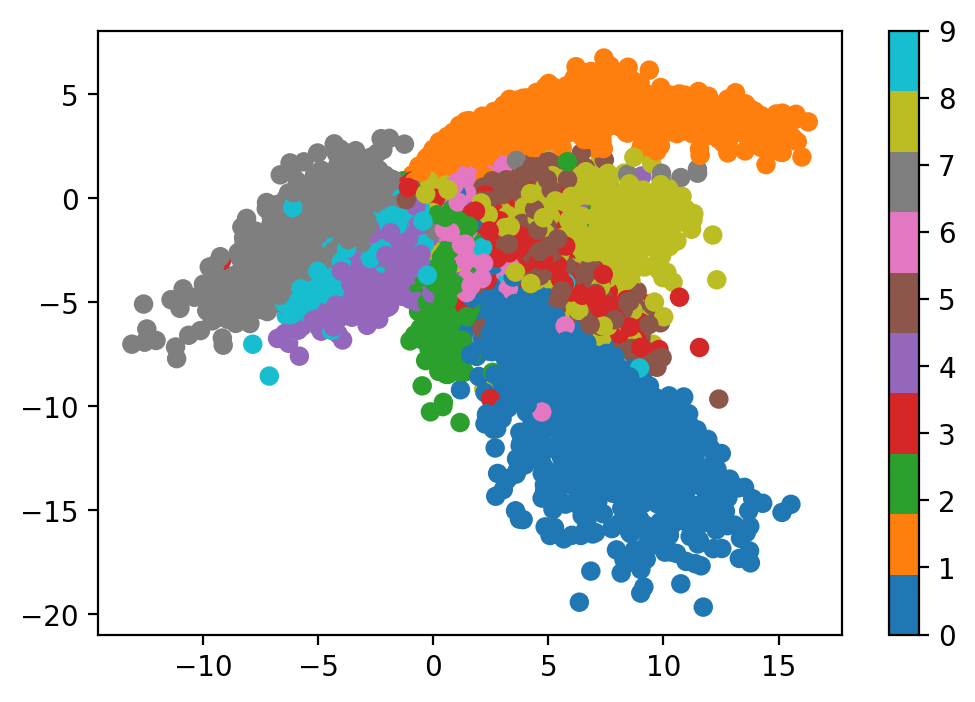

In [ ]:
plot_latent(autoencoder, data)

In [ ]:
def plot_reconstructed(autoencoder, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[x, y]]).to(device)
            x_hat = autoencoder.decoder(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])

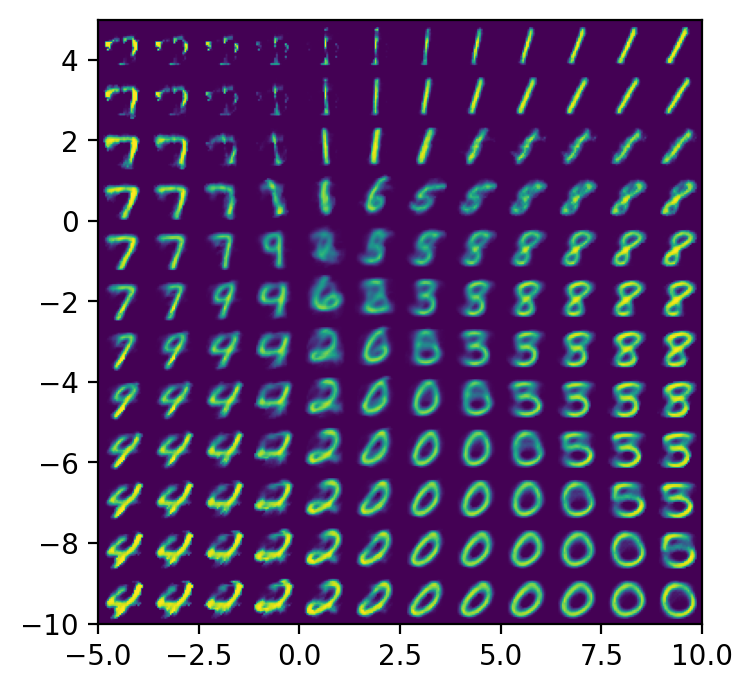

In [ ]:
plot_reconstructed(autoencoder)

In [ ]:
class VariationalEncoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalEncoder, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.linear2 = nn.Linear(512, latent_dims)
        self.linear3 = nn.Linear(512, latent_dims)

        self.N = torch.distributions.Normal(0, 1)
        self.N.loc = self.N.loc.cuda() # hack to get sampling on the GPU
        self.N.scale = self.N.scale.cuda()
        self.kl = 0

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        mu =  self.linear2(x)
        sigma = torch.exp(self.linear3(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z

In [ ]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [ ]:
def train(autoencoder, data, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        for x, y in data:
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).sum() + autoencoder.encoder.kl
            loss.backward()
            opt.step()
    return autoencoder

In [ ]:
vae = VariationalAutoencoder(latent_dims).to(device) # GPU
vae = train(vae, data)

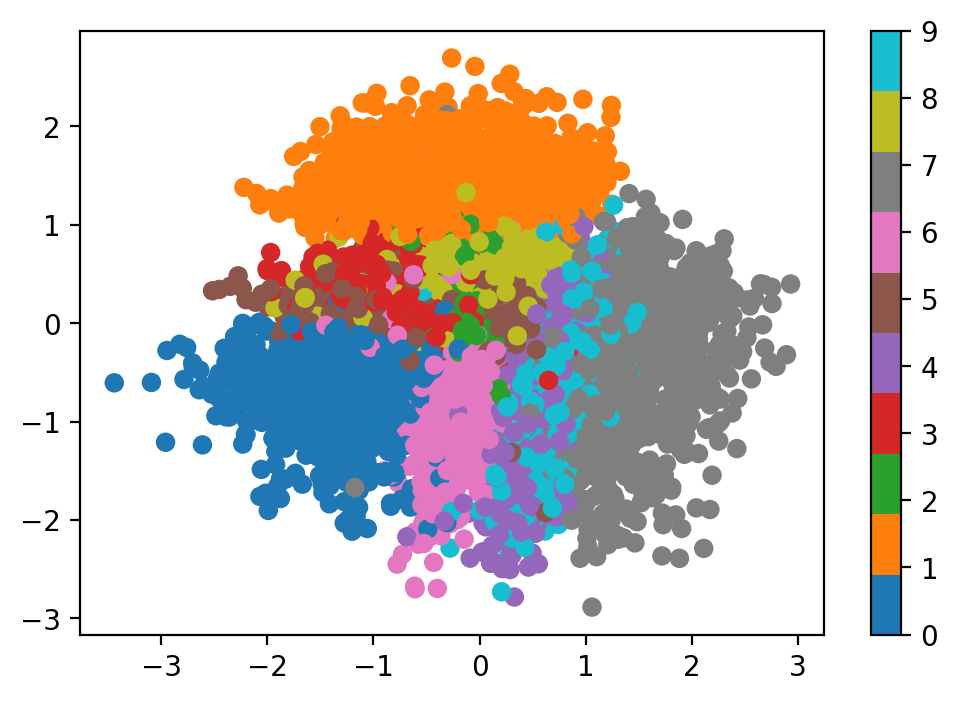

In [ ]:
plot_latent(vae, data)

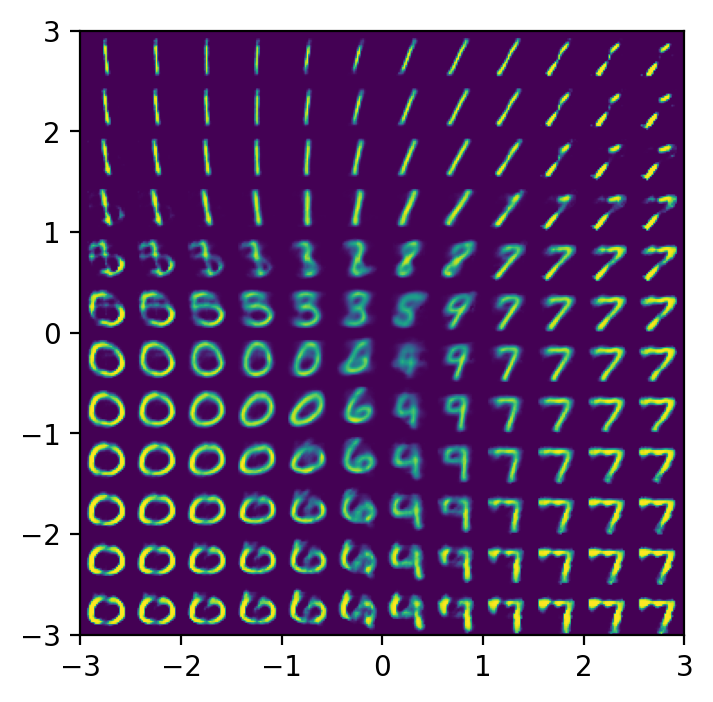

In [ ]:
plot_reconstructed(vae, r0=(-3, 3), r1=(-3, 3))